# Introduction
## Superpower

A superpower is a state with a dominant position characterized by its extensive ability to exert influence or project power on a global scale. This is done through the combined-means of economic, military, technological and cultural strength as well as diplomatic and soft power influence. Traditionally, superpowers are preeminent among the great powers.

A potential superpower is a state or a political and economic entity that is speculated to be—or to have the potential to soon become—a superpower.

##  Emerging Superpower
China, has been referred to as an emerging superpower, given that Beijing's power is now beyond the classification of a Great Power. A great power is a sovereign state that is recognized as having the ability and expertise to exert its influence on a global scale. Great powers characteristically possess military and economic strength, as well as diplomatic and soft power influence, which may cause middle or small powers to consider the great powers' opinions before taking actions of their own.


## Purpose of this analysis

In this analysis, we are going to compare the state of the Central Asian countries and these two superpowers (Russia, China).


![image](https://www.maps-of-the-world.org/maps/asia/central-asia/large-political-map-of-central-asian-states-with-major-cities-1995-preview.jpg)


<font color='yellow'>Russian Federation</font> 

<font color='red'>Kyrgyzstan</font>

<font color='green'>Kazakhstan</font>

<font color='purple'>Tajikistan</font> 

<font color='orange'>Uzbekistan</font> 

<font color='grey'>China</font> 


Using WorldBank data for Military Expenditure, Army Strength, GDP, Population and Land Area, I have collated the dataset. I will be exploring the three categories of this countries over a period of time to see how they have evolved. 

# Importing Relevant Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_context('talk')

# Reading Data

In [174]:
armedforces_tot = pd.read_csv('./API_MS.MIL.TOTL.P1_DS2_en_csv_v2_513199.csv')
milexp_gdp = pd.read_csv('./API_MS.MIL.XPND.GD.ZS_DS2_en_csv_v2_511529.csv')
milexp_govt = pd.read_csv('./API_MS.MIL.XPND.ZS_DS2_en_csv_v2_514803.csv')
milexp_usd = pd.read_csv('./Military Expenditure.csv')
land_area = pd.read_csv('./API_AG.LND.TOTL.K2_DS2_en_csv_v2_511817.csv')
pop = pd.read_csv('./API_SP.POP.TOTL_DS2_en_csv_v2_511378.csv')
gdp = pd.read_csv('./API_NY.GDP.MKTP.CD_DS2_en_csv_v2_559588.csv')

In [96]:
top_six = ['Russian Federation', 'China', 'Kyrgyz Republic', 'Kazakhstan', 'Tajikistan', 'Uzbekistan']

# Cleanup 

In [175]:
milexp_usd_six = milexp_usd[milexp_usd['Name'].isin(top_six)]
milexp_usd_six = milexp_usd_six.T.reset_index()
milexp_usd_six.columns = milexp_usd_six.iloc[0]
milexp_usd_six = milexp_usd_six.drop([0,1,2,3]).reset_index()
milexp_usd_six = milexp_usd_six.drop('index', axis=1)
milexp_usd_six = milexp_usd_six.rename(columns = {'Name': 'Mil Exp in USD'})
milexp_usd_six['Mil Exp in USD'] = milexp_usd_six['Mil Exp in USD'].astype(int)
milexp_usd_six['China'] = milexp_usd_six['China'].astype(float)
milexp_usd_six['Russian Federation'] = milexp_usd_six['Russian Federation'].astype(float)
milexp_usd_six['Kyrgyz Republic'] = milexp_usd_six['Kyrgyz Republic'].astype(float)
milexp_usd_six['Kazakhstan'] = milexp_usd_six['Kazakhstan'].astype(float)
milexp_usd_six['Uzbekistan'] = milexp_usd_six['Uzbekistan'].astype(float)
milexp_usd_six['Tajikistan'] = milexp_usd_six['Tajikistan'].astype(float)

milexp_usd_six = milexp_usd_six[milexp_usd_six['Mil Exp in USD'] > 1992]

armedforces_six = armedforces_tot[armedforces_tot['Country Name'].isin(top_six)]
armedforces_six = armedforces_six.T.reset_index()
armedforces_six.columns = armedforces_six.iloc[0]
armedforces_six = armedforces_six.drop([0,1,2,3]).reset_index()
armedforces_six = armedforces_six.drop('index', axis=1)
armedforces_six = armedforces_six.rename(columns = {'Country Name': 'Armed Forces Total'})
armedforces_six = armedforces_six[armedforces_six['Armed Forces Total'] != 'Unnamed: 64']
armedforces_six['Armed Forces Total'] = armedforces_six['Armed Forces Total'].astype(int)
armedforces_six = armedforces_six[armedforces_six['Armed Forces Total'] > 1992]
armedforces_six['China'] = armedforces_six['China'].astype(float)
armedforces_six['Russian Federation'] = armedforces_six['Russian Federation'].astype(float)
armedforces_six['Kyrgyz Republic'] = armedforces_six['Kyrgyz Republic'].astype(float)
armedforces_six['Kazakhstan'] = armedforces_six['Kazakhstan'].astype(float)
armedforces_six['Uzbekistan'] = armedforces_six['Uzbekistan'].astype(float)
armedforces_six['Tajikistan'] = armedforces_six['Tajikistan'].astype(float)

milexp_gdp_six = milexp_gdp[milexp_gdp['Country Name'].isin(top_six)]
milexp_gdp_six = milexp_gdp_six.T.reset_index()
milexp_gdp_six.columns = milexp_gdp_six.iloc[0]
milexp_gdp_six = milexp_gdp_six.drop([0,1,2,3]).reset_index()
milexp_gdp_six = milexp_gdp_six.drop('index', axis=1)
milexp_gdp_six = milexp_gdp_six.rename(columns = {'Country Name': 'Mil Exp % GDP'})
milexp_gdp_six = milexp_gdp_six[milexp_gdp_six['Mil Exp % GDP'] != 'Unnamed: 64']
milexp_gdp_six['Mil Exp % GDP'] = milexp_gdp_six['Mil Exp % GDP'].astype(int)
milexp_gdp_six = milexp_gdp_six[milexp_gdp_six['Mil Exp % GDP'] > 1992]
milexp_gdp_six['China'] = milexp_gdp_six['China'].astype(float)
milexp_gdp_six['Russian Federation'] = milexp_gdp_six['Russian Federation'].astype(float)
milexp_gdp_six['Kyrgyz Republic'] = milexp_gdp_six['Kyrgyz Republic'].astype(float)
milexp_gdp_six['Kazakhstan'] = milexp_gdp_six['Kazakhstan'].astype(float)
milexp_gdp_six['Uzbekistan'] = milexp_gdp_six['Uzbekistan'].astype(float)
milexp_gdp_six['Tajikistan'] = milexp_gdp_six['Tajikistan'].astype(float)

milexp_govt_six = milexp_govt[milexp_govt['Country Name'].isin(top_six)]
milexp_govt_six = milexp_govt_six.T.reset_index()
milexp_govt_six.columns = milexp_govt_six.iloc[0]
milexp_govt_six = milexp_govt_six.drop([0,1,2,3]).reset_index()
milexp_govt_six = milexp_govt_six.drop('index', axis=1)
milexp_govt_six = milexp_govt_six.rename(columns = {'Country Name': 'Mil Exp % Govt Exp'})
milexp_govt_six = milexp_govt_six[milexp_govt_six['Mil Exp % Govt Exp'] != 'Unnamed: 64']
milexp_govt_six['Mil Exp % Govt Exp'] = milexp_govt_six['Mil Exp % Govt Exp'].astype(int)
milexp_govt_six = milexp_govt_six[milexp_govt_six['Mil Exp % Govt Exp'] > 1992]
milexp_govt_six['China'] = milexp_govt_six['China'].astype(float)
milexp_govt_six['Russian Federation'] = milexp_govt_six['Russian Federation'].astype(float)
milexp_govt_six['Kyrgyz Republic'] = milexp_govt_six['Kyrgyz Republic'].astype(float)
milexp_govt_six['Kazakhstan'] = milexp_govt_six['Kazakhstan'].astype(float)
milexp_govt_six['Uzbekistan'] = milexp_govt_six['Uzbekistan'].astype(float)
milexp_govt_six['Tajikistan'] = milexp_govt_six['Tajikistan'].astype(float)

land_area_six = land_area[land_area['Country Name'].isin(top_six)]
land_area_six = land_area_six.T.reset_index()
land_area_six.columns = land_area_six.iloc[0]
land_area_six = land_area_six.drop([0,1,2,3]).reset_index()
land_area_six = land_area_six.drop('index', axis=1)
land_area_six = land_area_six.rename(columns = {'Country Name': 'Land Area'})
land_area_six = land_area_six[land_area_six['Land Area'] != 'Unnamed: 64']
land_area_six['Land Area'] = land_area_six['Land Area'].astype(int)
land_area_six['China'] = land_area_six['China'].astype(float)
land_area_six['Russian Federation'] = land_area_six['Russian Federation'].astype(float)
land_area_six['Kyrgyz Republic'] = land_area_six['Kyrgyz Republic'].astype(float)
land_area_six['Kazakhstan'] = land_area_six['Kazakhstan'].astype(float)
land_area_six['Uzbekistan'] = land_area_six['Uzbekistan'].astype(float)
land_area_six['Tajikistan'] = land_area_six['Tajikistan'].astype(float)
land_area_six = land_area_six[land_area_six['Land Area'] > 1992]

pop_six = pop[pop['Country Name'].isin(top_six)]
pop_six = pop_six.T.reset_index()
pop_six.columns = pop_six.iloc[0]
pop_six = pop_six.drop([0,1,2,3]).reset_index()
pop_six = pop_six.drop('index', axis=1)
pop_six = pop_six.rename(columns = {'Country Name': 'Population'})
pop_six = pop_six[pop_six['Population'] != 'Unnamed: 64']
pop_six['Population'] = pop_six['Population'].astype(int)
pop_six['China'] = pop_six['China'].astype(float)
pop_six['Russian Federation'] = pop_six['Russian Federation'].astype(float)
pop_six['Kyrgyz Republic'] = pop_six['Kyrgyz Republic'].astype(float)       
pop_six['Kazakhstan'] = pop_six['Kazakhstan'].astype(float)
pop_six['Uzbekistan'] = pop_six['Uzbekistan'].astype(float)
pop_six['Tajikistan'] = pop_six['Tajikistan'].astype(float)     
pop_six = pop_six[pop_six['Population'] > 1992]

gdp_six = gdp[gdp['Country Name'].isin(top_six)]
gdp_six = gdp_six.T.reset_index()
gdp_six.columns = gdp_six.iloc[0]
gdp_six = gdp_six.drop([0,1,2,3]).reset_index()
gdp_six = gdp_six.drop('index', axis=1)
gdp_six = gdp_six.rename(columns = {'Country Name': 'GDP'})
gdp_six = gdp_six[gdp_six['GDP'] != 'Unnamed: 64']
gdp_six['GDP'] = gdp_six['GDP'].astype(int)
gdp_six['China'] = gdp_six['China'].astype(float)
gdp_six['Russian Federation'] = gdp_six['Russian Federation'].astype(float)
gdp_six['Kyrgyz Republic'] = gdp_six['Kyrgyz Republic'].astype(float) 
gdp_six['Kazakhstan'] = gdp_six['Kazakhstan'].astype(float) 
gdp_six['Uzbekistan'] = gdp_six['Uzbekistan'].astype(float) 
gdp_six['Tajikistan'] = gdp_six['Tajikistan'].astype(float) 
gdp_six = gdp_six[gdp_six['GDP'] > 1992]

# Superpower - Russia

![Russia](https://cdn.countryflags.com/thumbs/russia/flag-400.png)


## a) Land Area

In [100]:
land_area_six['Russian Federation'].max()

17100000.0

The data states, Russian Federation has an approximate land area of 17.1 million sq. km.                                   


                                                                                                                                     
## b) Population

Text(0.5, 1.0, 'Population of Russian Federation - 1992 Onwards')

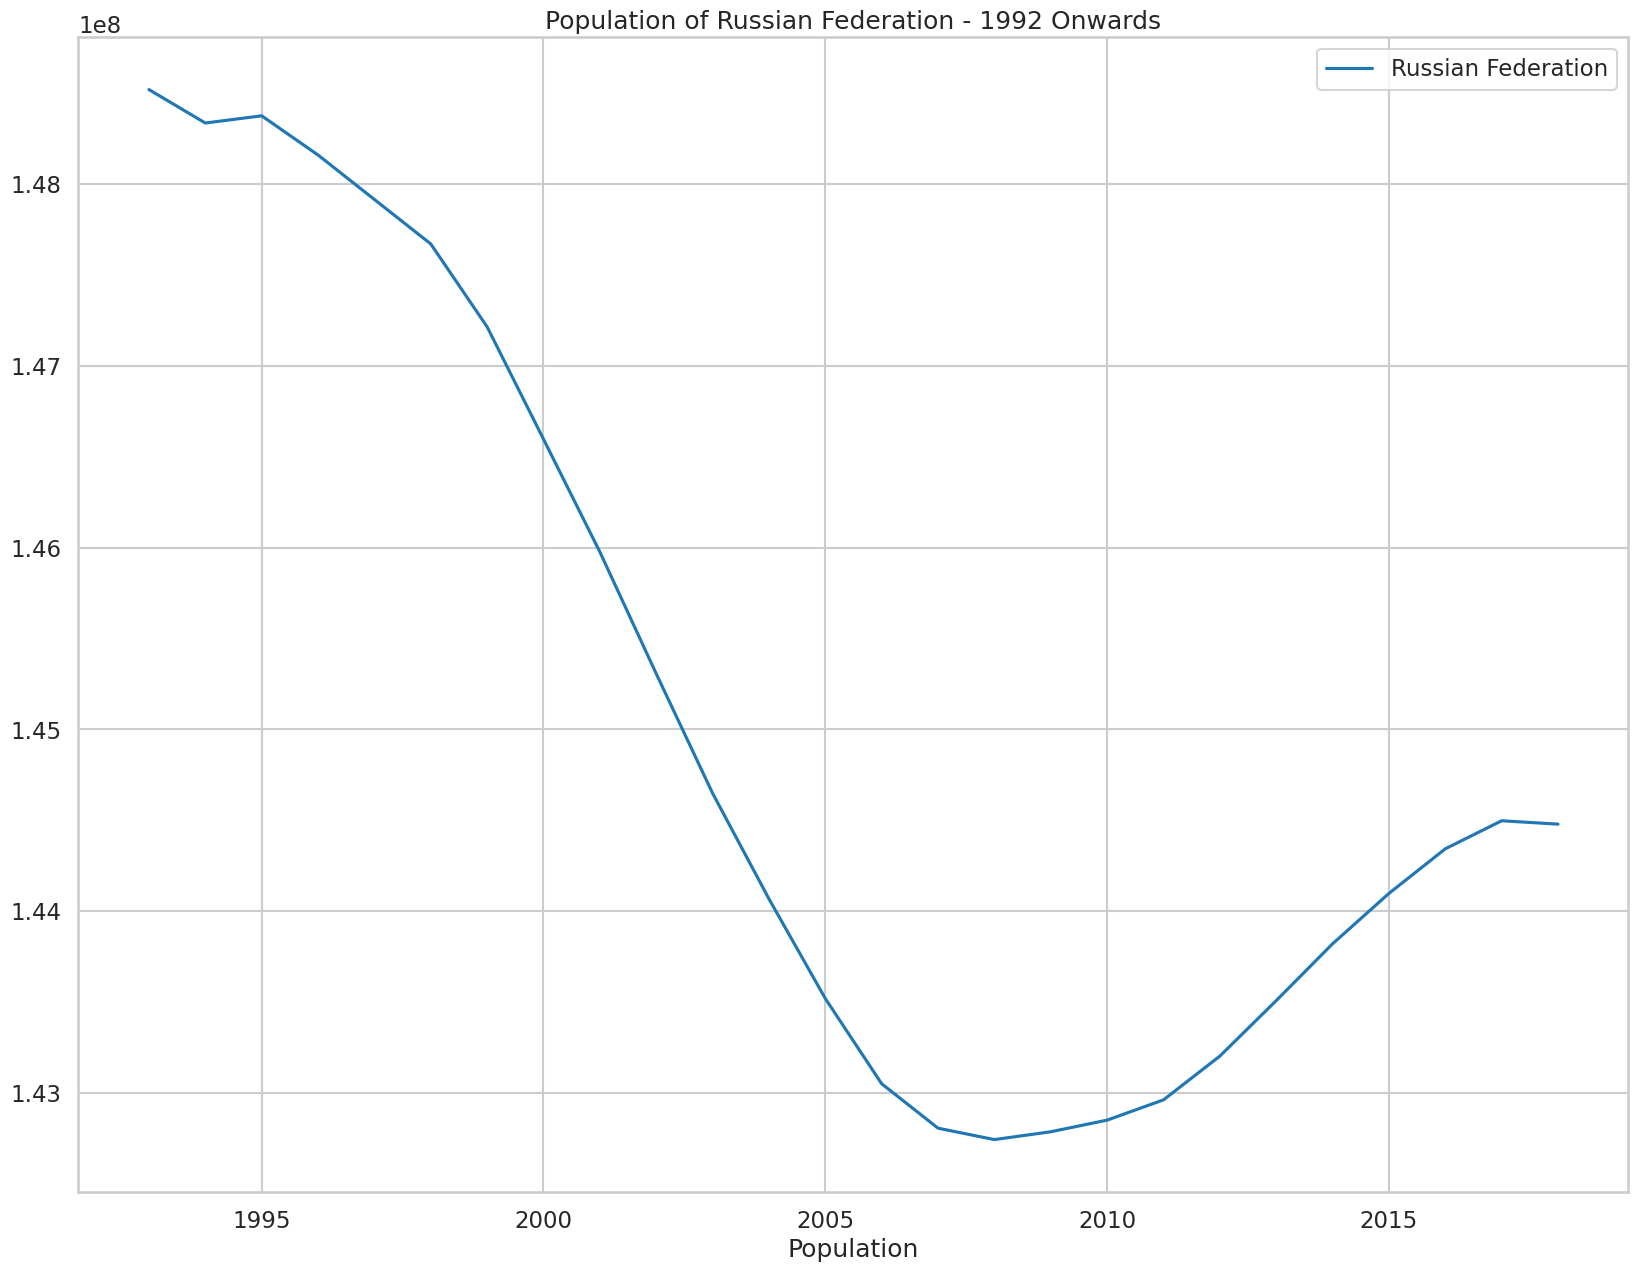

In [106]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
pop_six.plot(kind='line',x='Population',y='Russian Federation',ax=ax)
plt.title('Population of Russian Federation - 1992 Onwards')


According to the data, Begining 1992, at around 148.7 million, the population for the Russian Federation in 2019 at 144.4 million. 
                                                                                                                                                                                                                                                                                                                                                                 
## c) GDP

Text(0.5, 1.0, 'GDP of Russian Federation - 1992 Onwards')

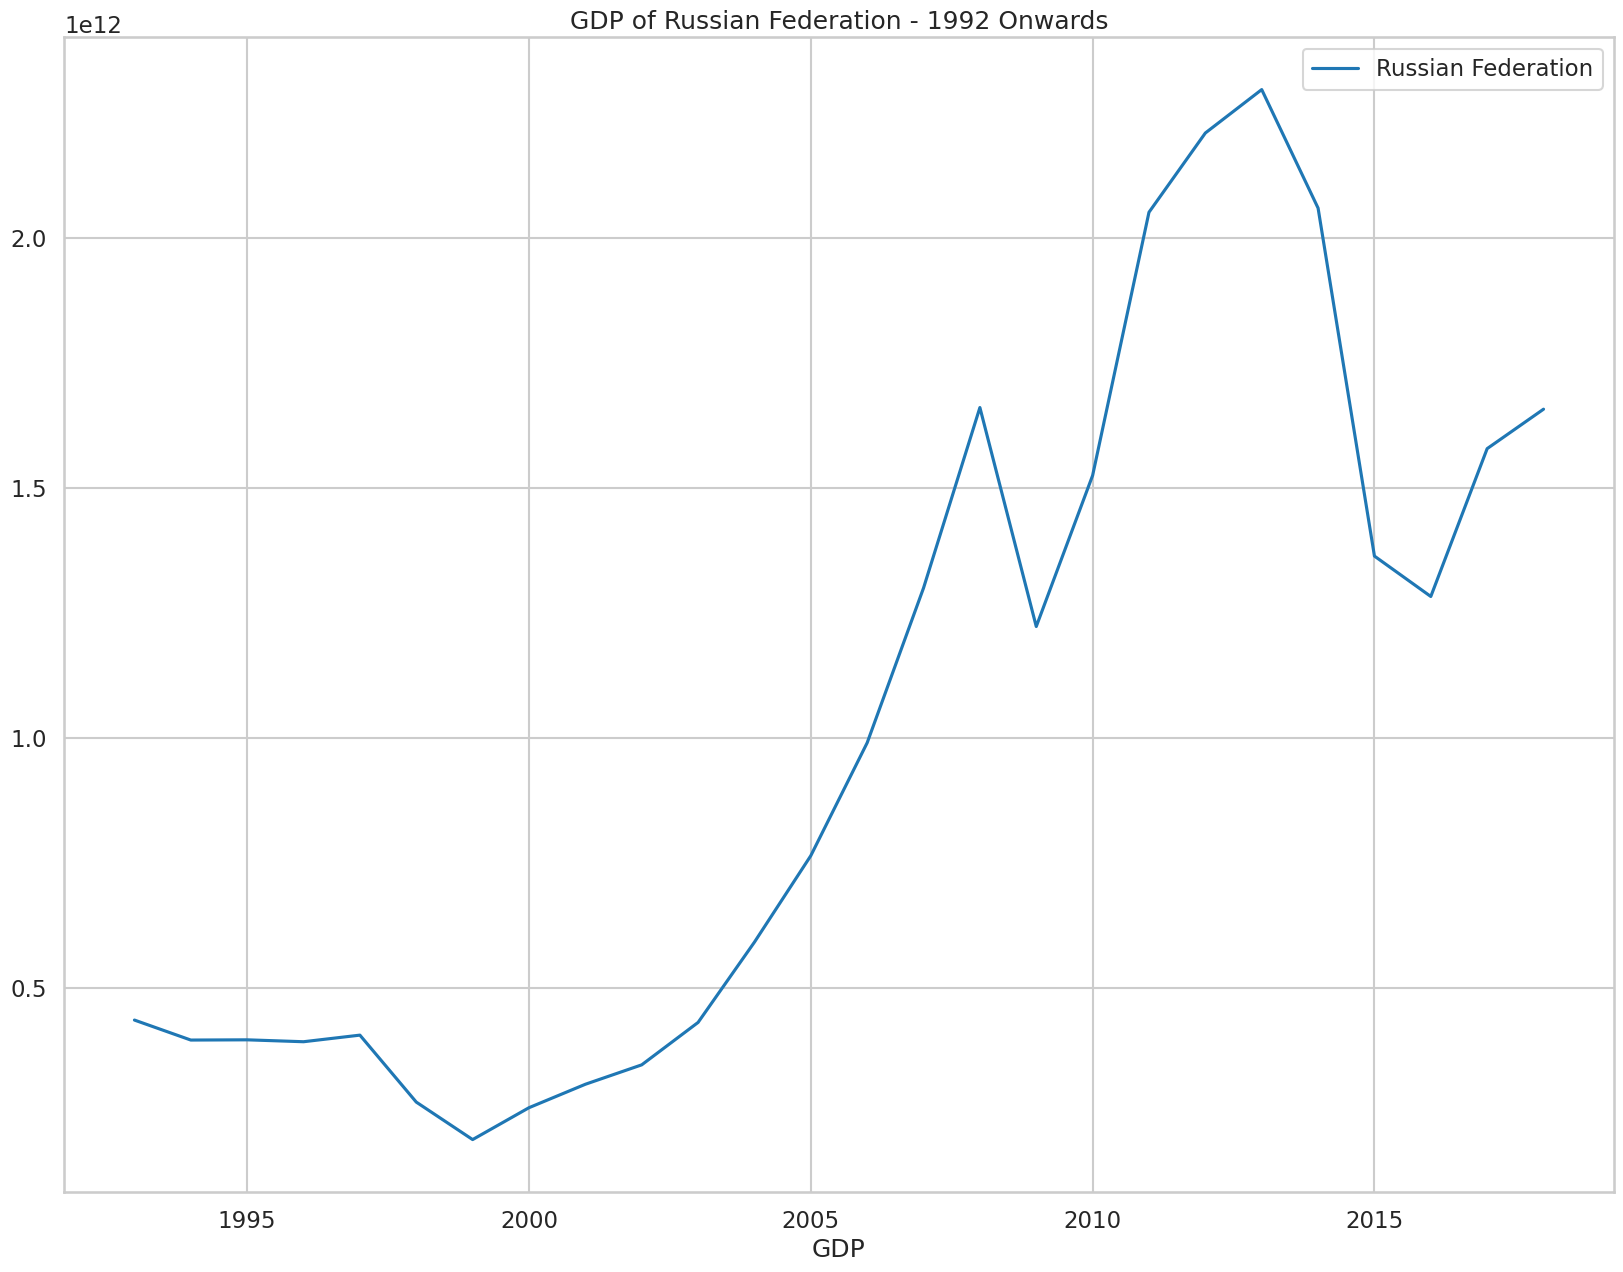

In [107]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
gdp_six.plot(kind='line',x='GDP',y='Russian Federation',ax=ax)
plt.title('GDP of Russian Federation - 1992 Onwards')


This graph represents the GDP (Gross Domestic Product) of the Russian Federation in current US dollars from 1992 to 2019. The GDP values show fluctuations over the years, with a peak of around 1.66 trillion USD in 2019.
## d) Military

### (i) Army Forces Total

Text(0.5, 1.0, 'Armed Forces Strength of Russian Federation - 1992 Onwards')

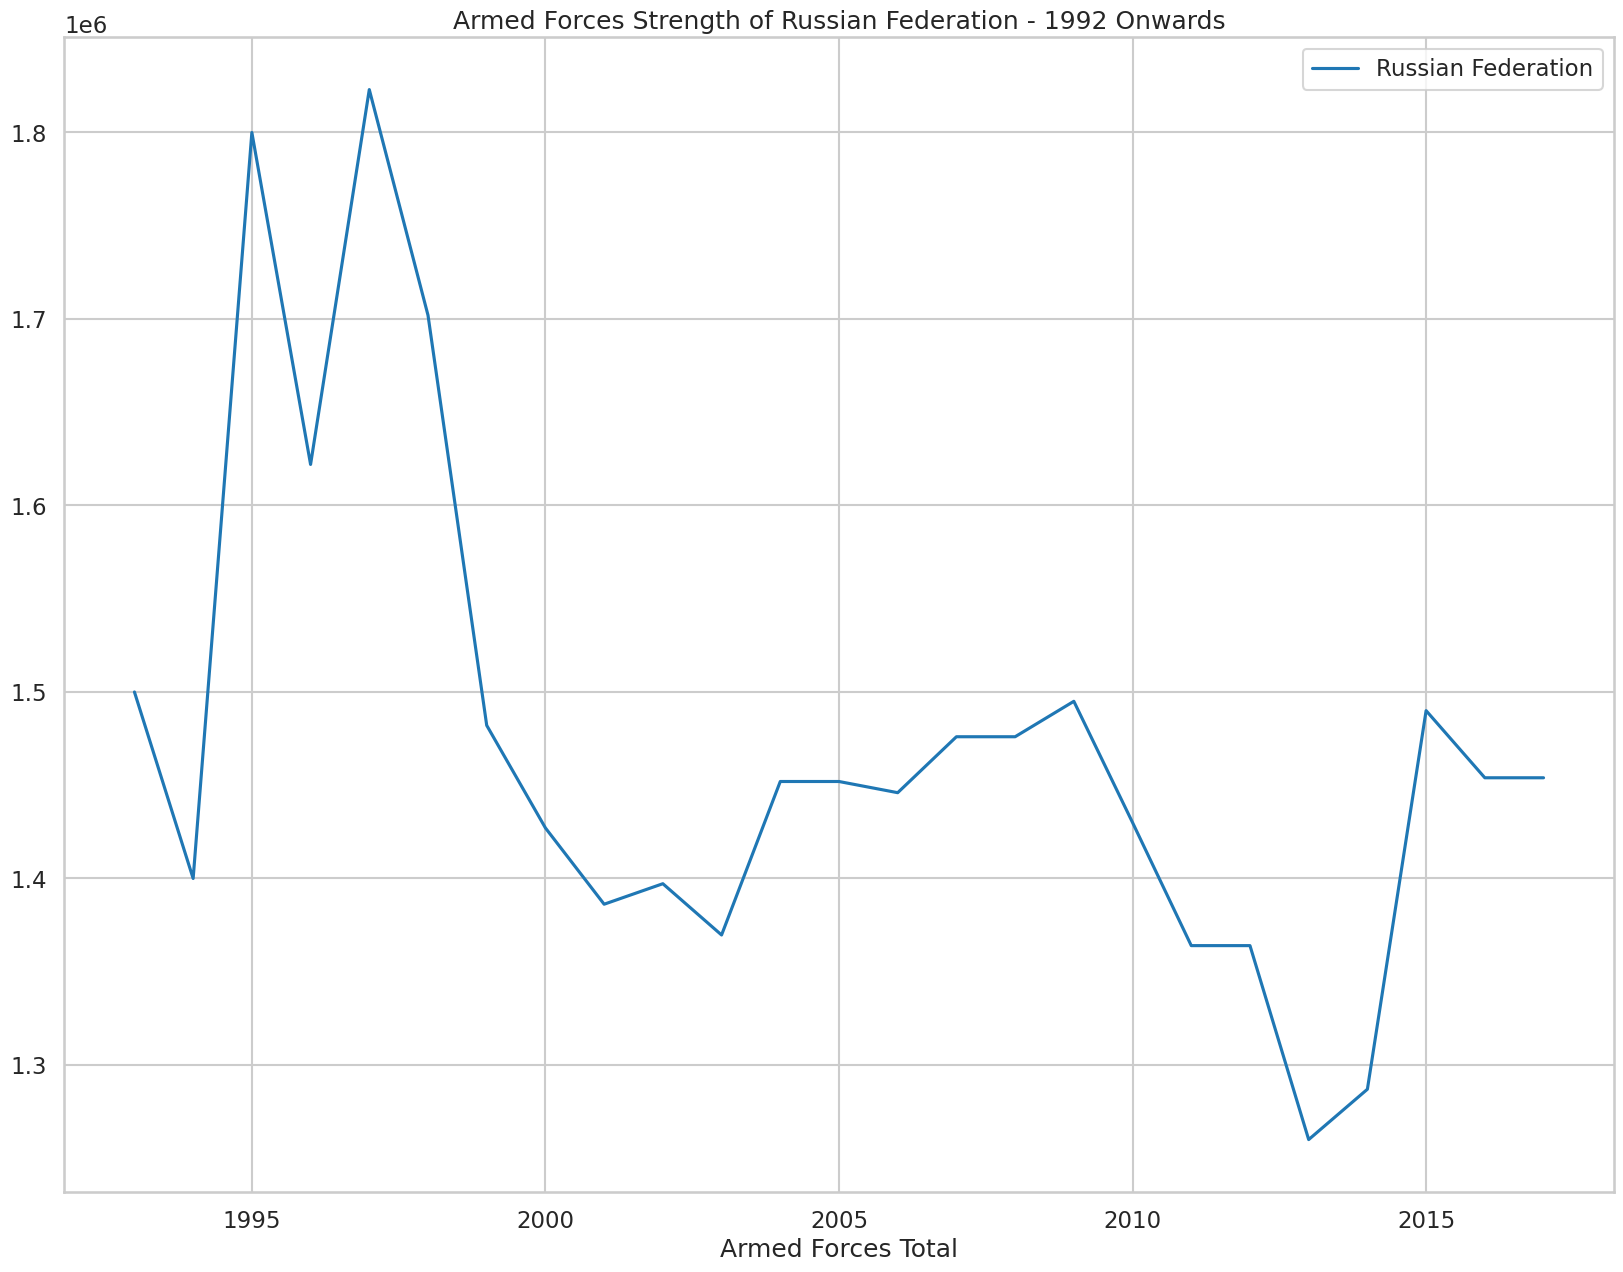

In [108]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
armedforces_six.plot(kind='line',x='Armed Forces Total',y='Russian Federation',ax=ax)
plt.title('Armed Forces Strength of Russian Federation - 1992 Onwards')


The data represents the total number of armed forces personnel in the Russian Federation from 1992 to 2017. The numbers fluctuated over the years, ranging from 1,264,000 personnel to a peak of 1,900,000 personnel.

### (ii) Military Expenditure (% GDP)

Text(0.5, 1.0, 'Military Expenditure as a % of GDP Russian Federation - 1992 Onwards')

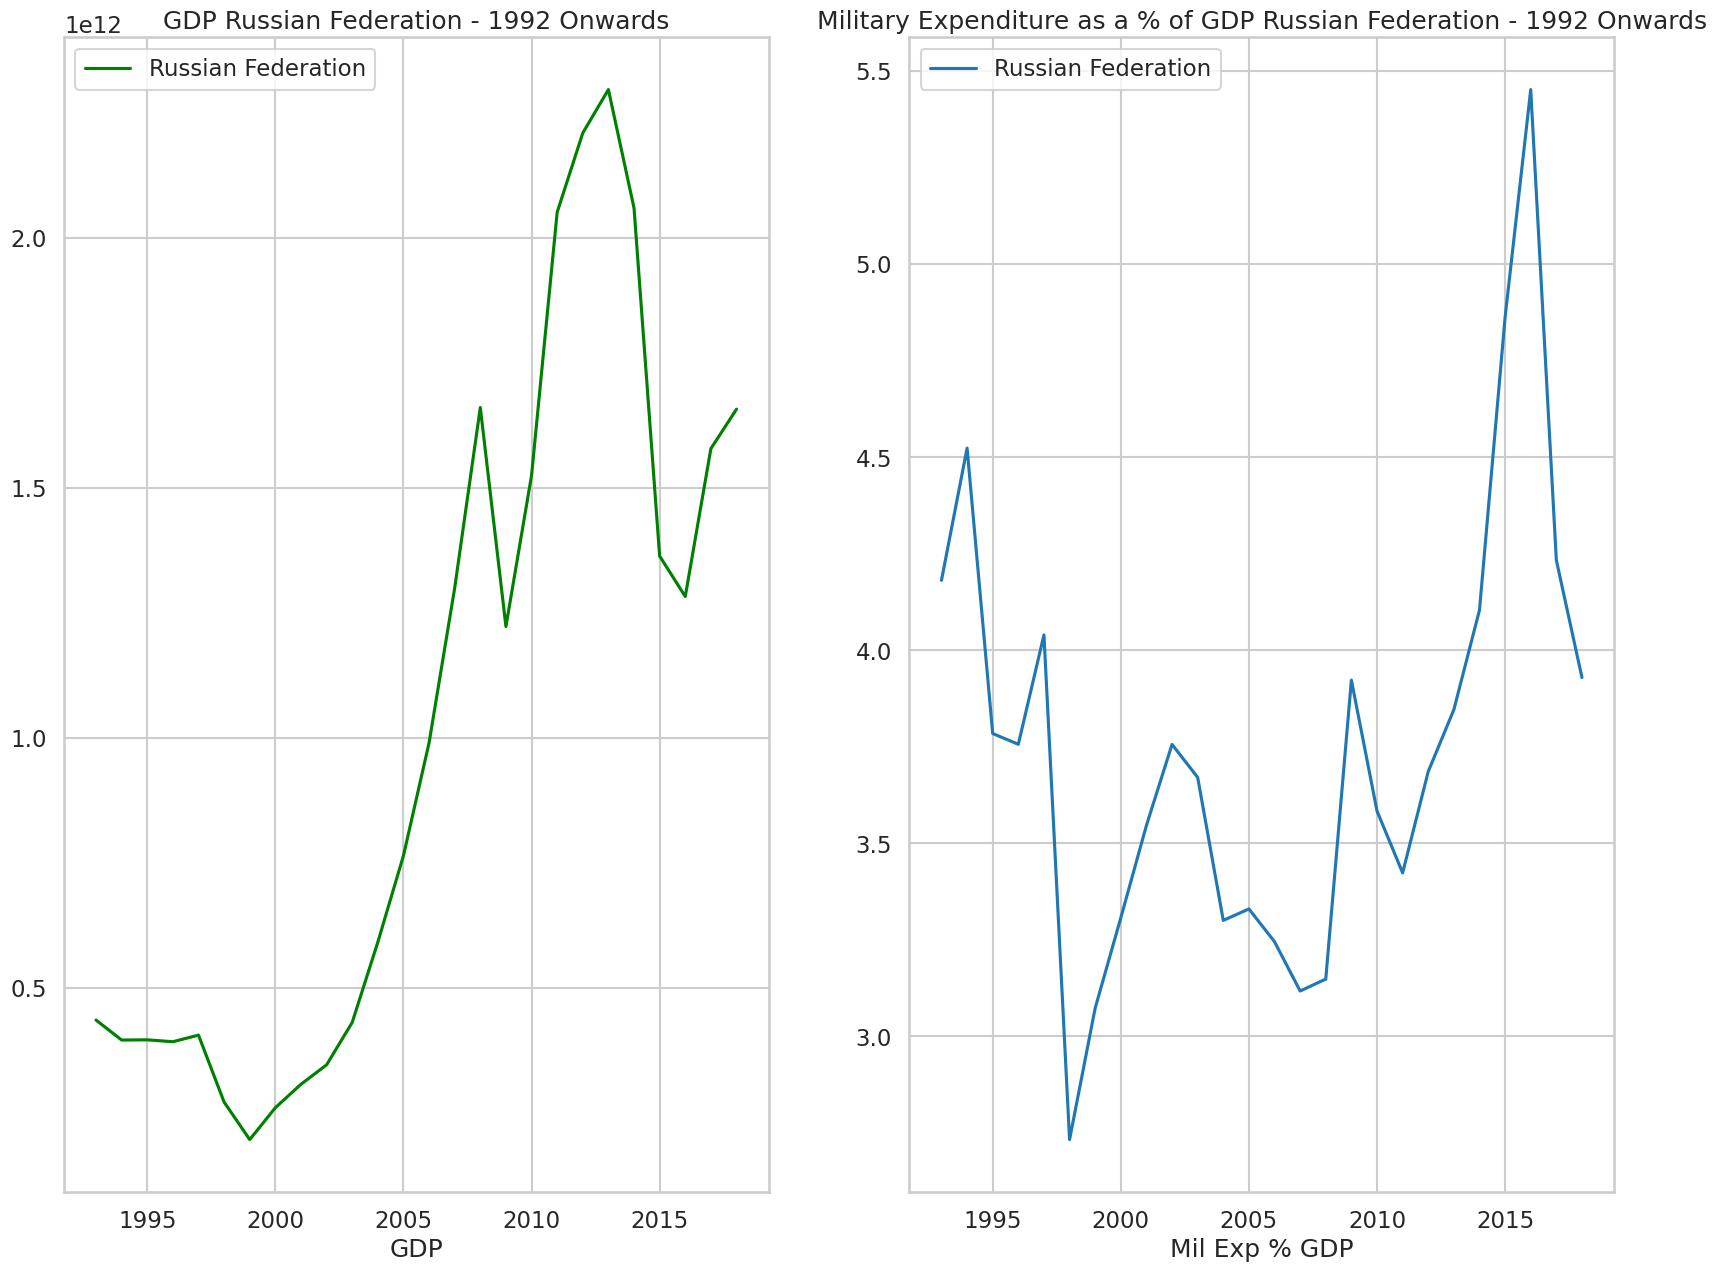

In [109]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,15))
ax = plt.gca()
gdp_six.plot(kind='line',x='GDP',y='Russian Federation',ax=ax1, color='green')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='Russian Federation',ax=ax2)
ax1.set_title('GDP Russian Federation - 1992 Onwards')
ax2.set_title('Military Expenditure as a % of GDP Russian Federation - 1992 Onwards')

This graph represents the military expenditure of the Russian Federation in current US dollars over a period of time. The military spending varied, reaching a peak of around 88.35 billion USD in 2019.


The graph clearly shows that US Govt invested heavily in their military strength during the war period from 2001-2010. The Expenditure also is a steep increase closing to 711 billion dollars. 

# Emerging Superpower - China

![China](https://cdn.countryflags.com/thumbs/china/flag-400.png)

## a) Land Area

In [14]:
land_area_six['China'].max()

9388250.0

The total land area of China is around 9.3  million sq km. 

## b) Population

Text(0.5, 1.0, 'Population of China - 1992 Onwards')

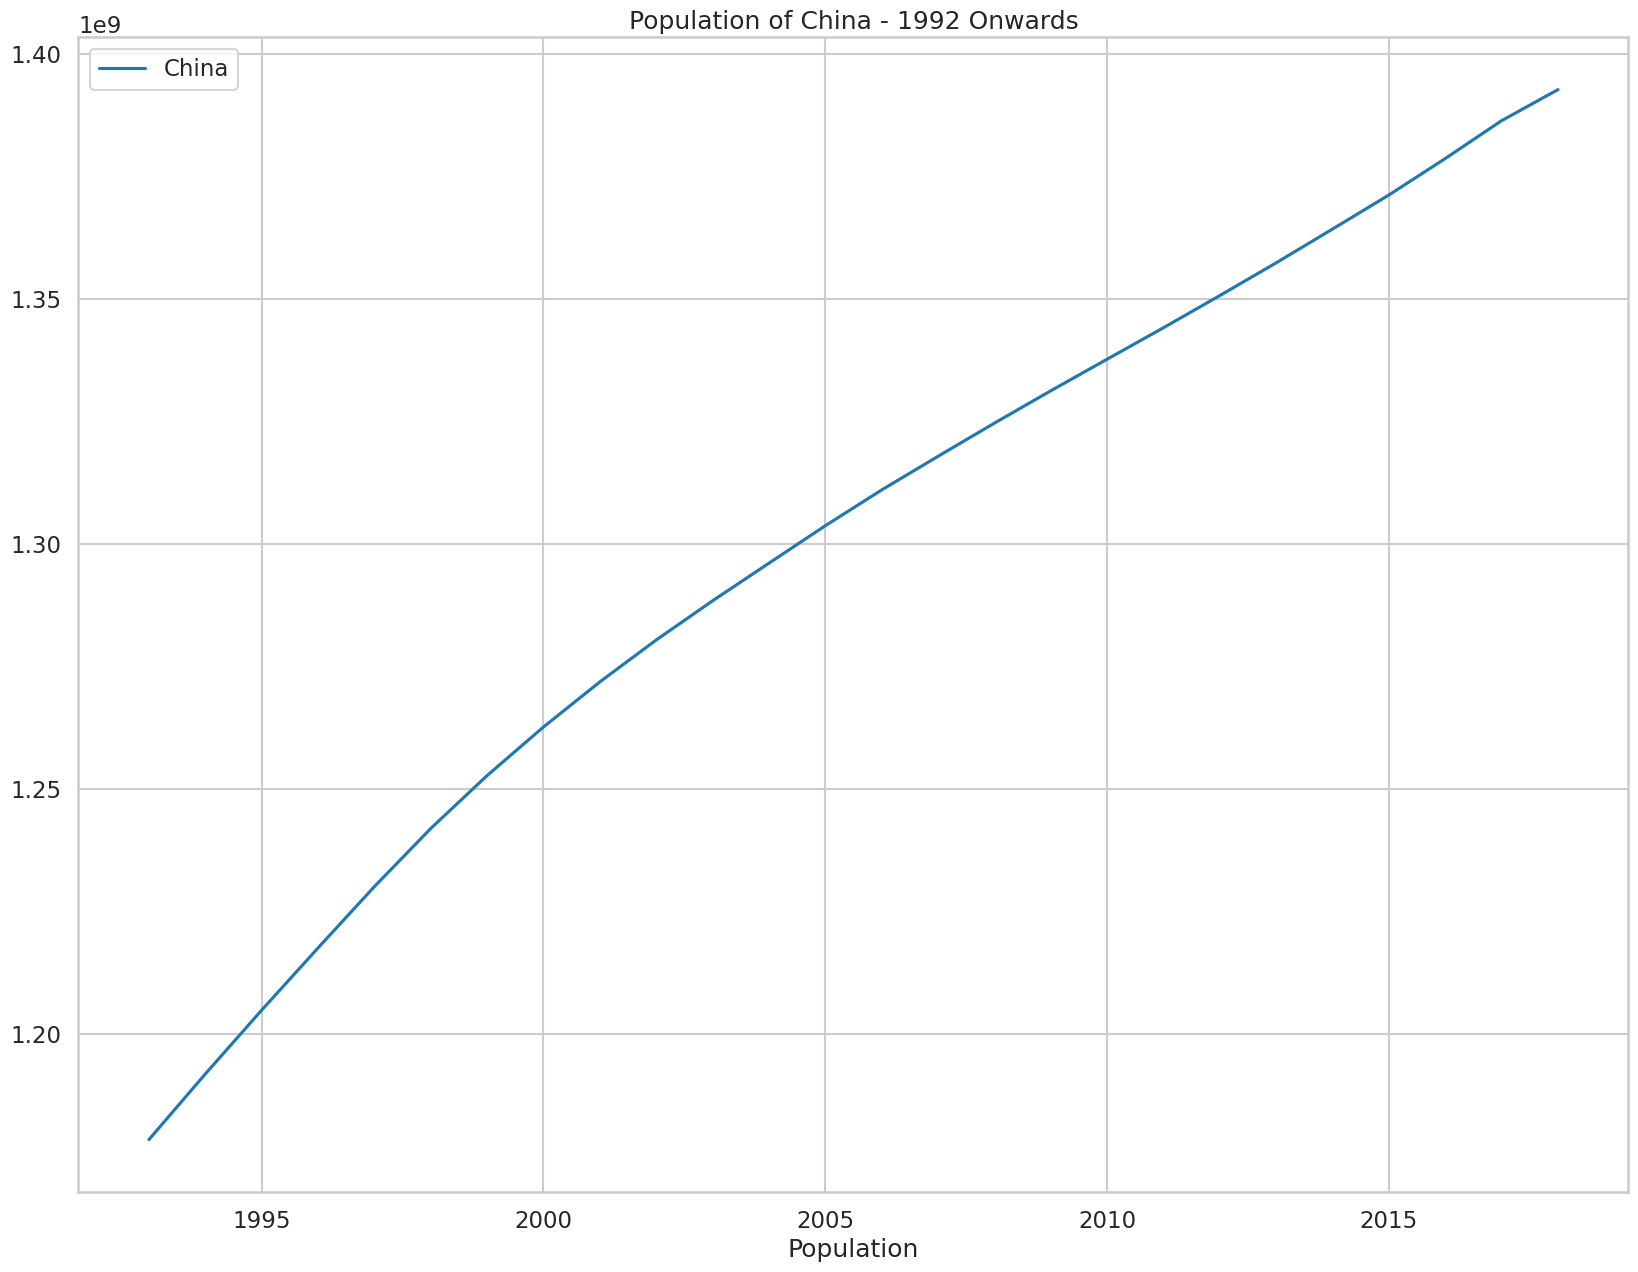

In [15]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
pop_six.plot(kind='line',x='Population',y='China',ax=ax)
plt.title('Population of China - 1992 Onwards')


The population for China is a linear increase which started at 1.2 billion in 1992, to almost 1.4 billion a decade and half later. 

## c) GDP

Text(0.5, 1.0, 'GDP of China - 1992 Onwards')

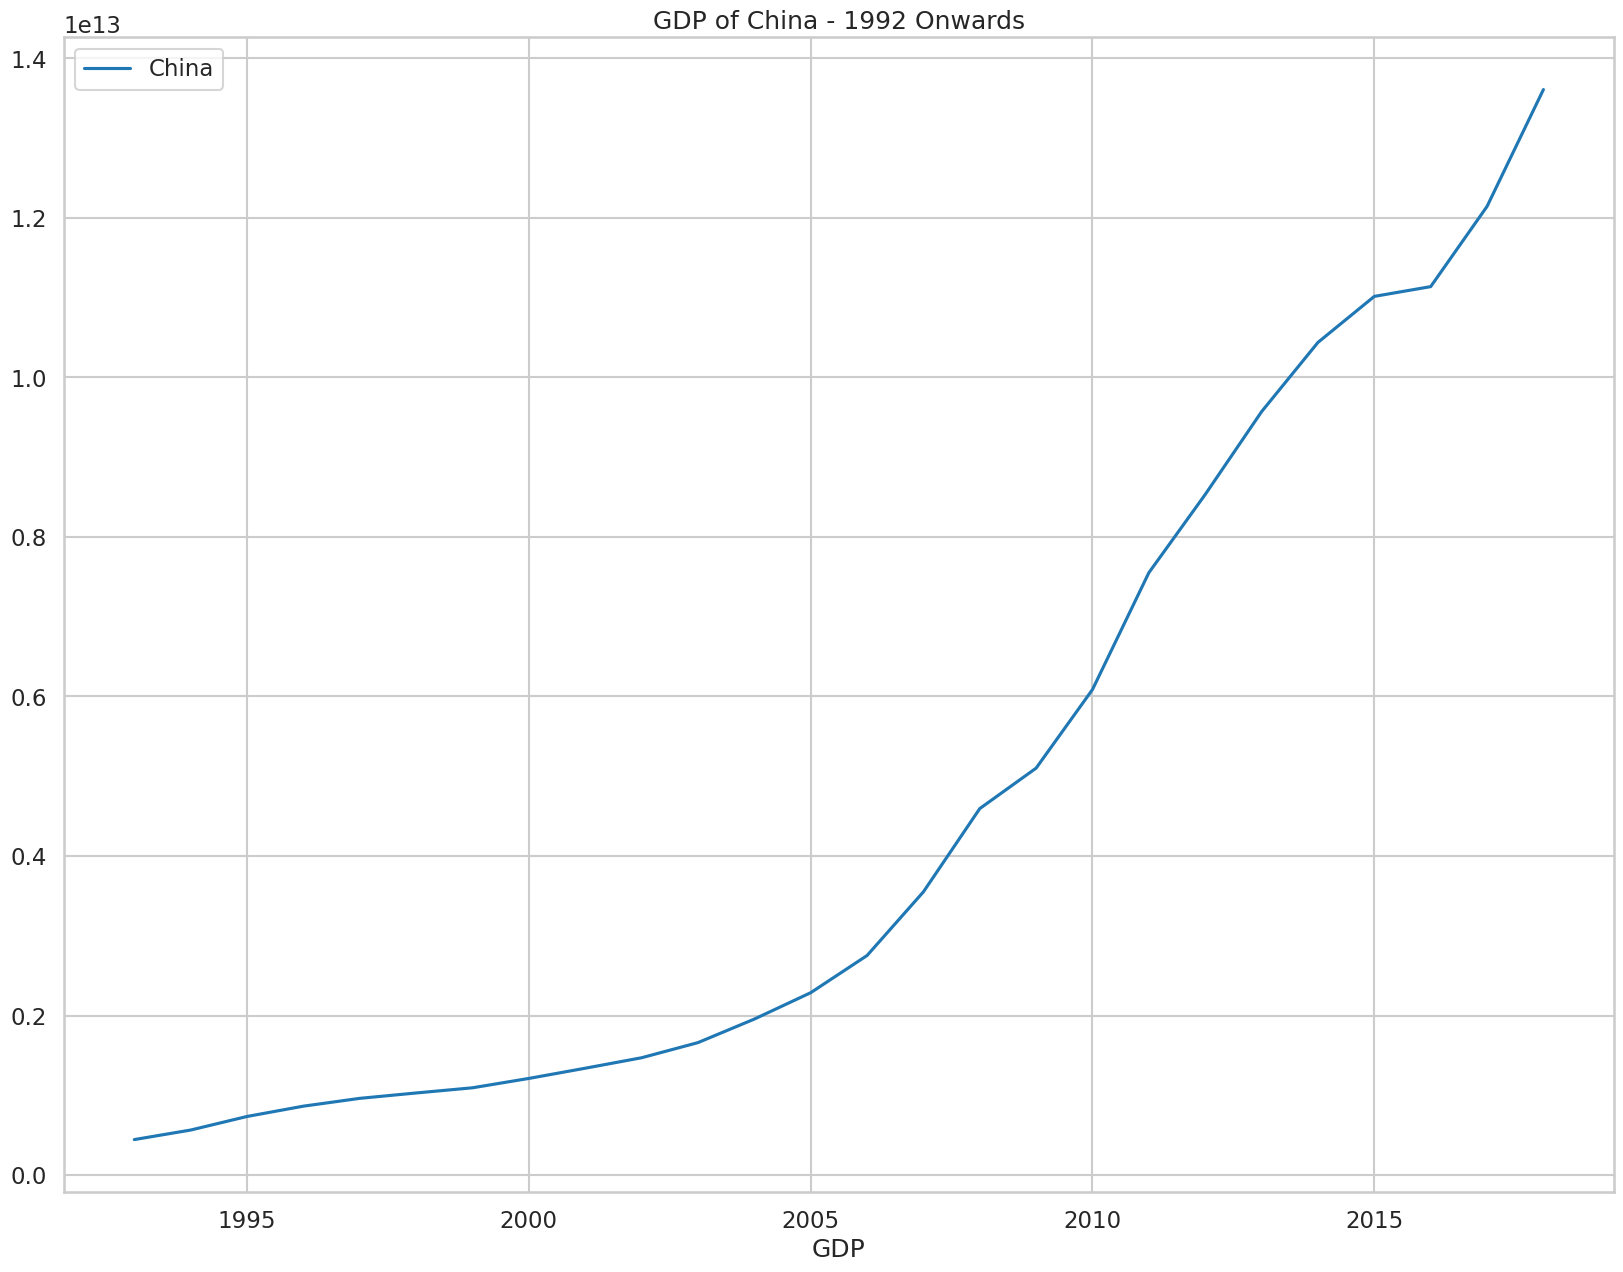

In [157]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
gdp_six.plot(kind='line',x='GDP',y='China',ax=ax)
# gdp_six['China'].plot.bar(x='GDP', y='China')
plt.title('GDP of China - 1992 Onwards')


Wow! No wonder China is an emerging superpower. Their economy grew from a meagre 490 billion $ in 1992 to 13.5 trillion in 2018

Wiki states - 

> Between 1978 and 2005, China's per capita GDP grew from 153 dollars  to 1,284 dollars. Its current account surplus increased more than twelve-fold between 1982 and 2004, from 5.7  billion dollars to 71 billion dollars. During this time, China also became an industrial powerhouse, moving beyond initial successes in low-wage sectors like clothing and footwear to the increasingly sophisticated production of computers, pharmaceuticals, and automobiles

Source: https://en.wikipedia.org/wiki/Economy_of_China

## d) Military

### (i) Army Forces Total

Text(0.5, 1.0, 'Armed Forces Strength of China - 1992 Onwards')

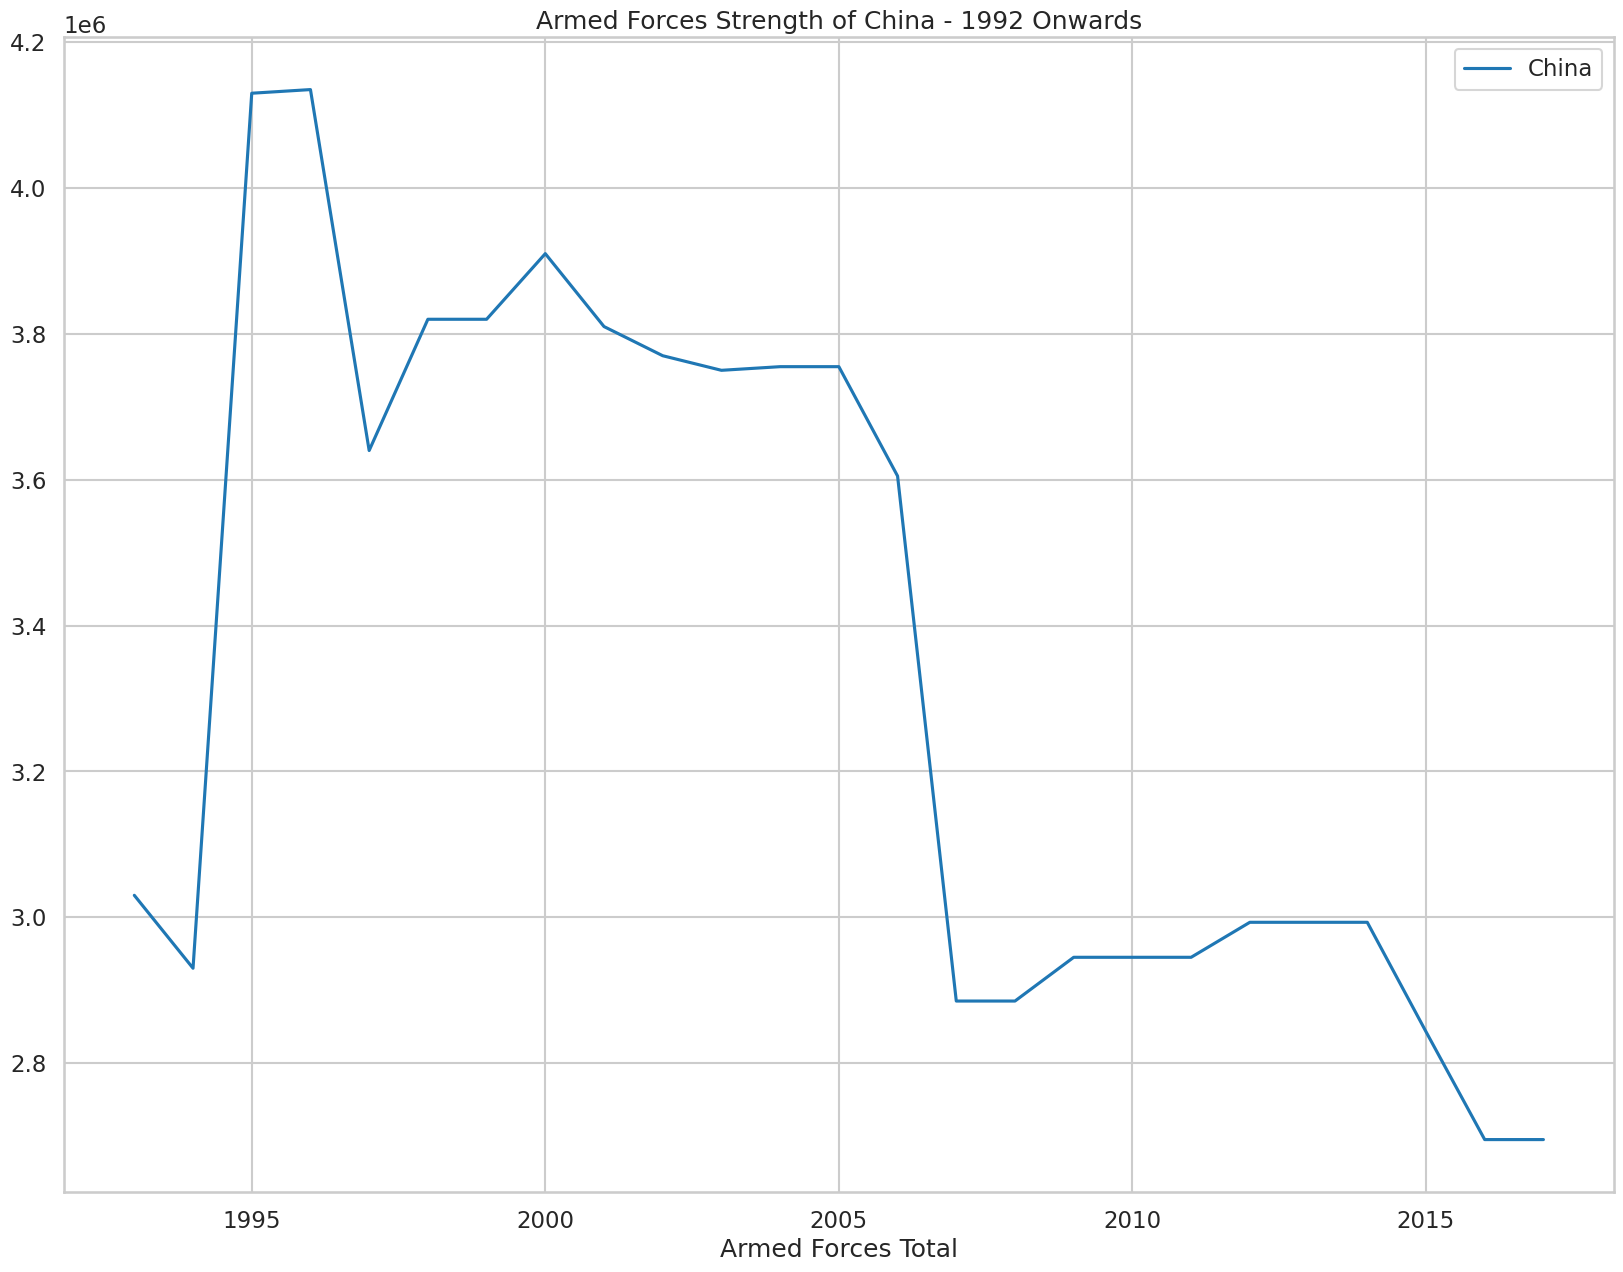

In [18]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
ax = plt.gca()
armedforces_six.plot(kind='line',x='Armed Forces Total',y='China',ax=ax)
plt.title('Armed Forces Strength of China - 1992 Onwards')


At 1995 China hit a maximum with 4.2 million, almost 4 times US's 2018 strength post which it has mellowed slowly to 2.5 million, which is again almost twice of the US.

### (ii) Military Expenditure (% GDP)

Text(0.5, 1.0, 'Military Expenditure as a % of GDP China - 1992 Onwards')

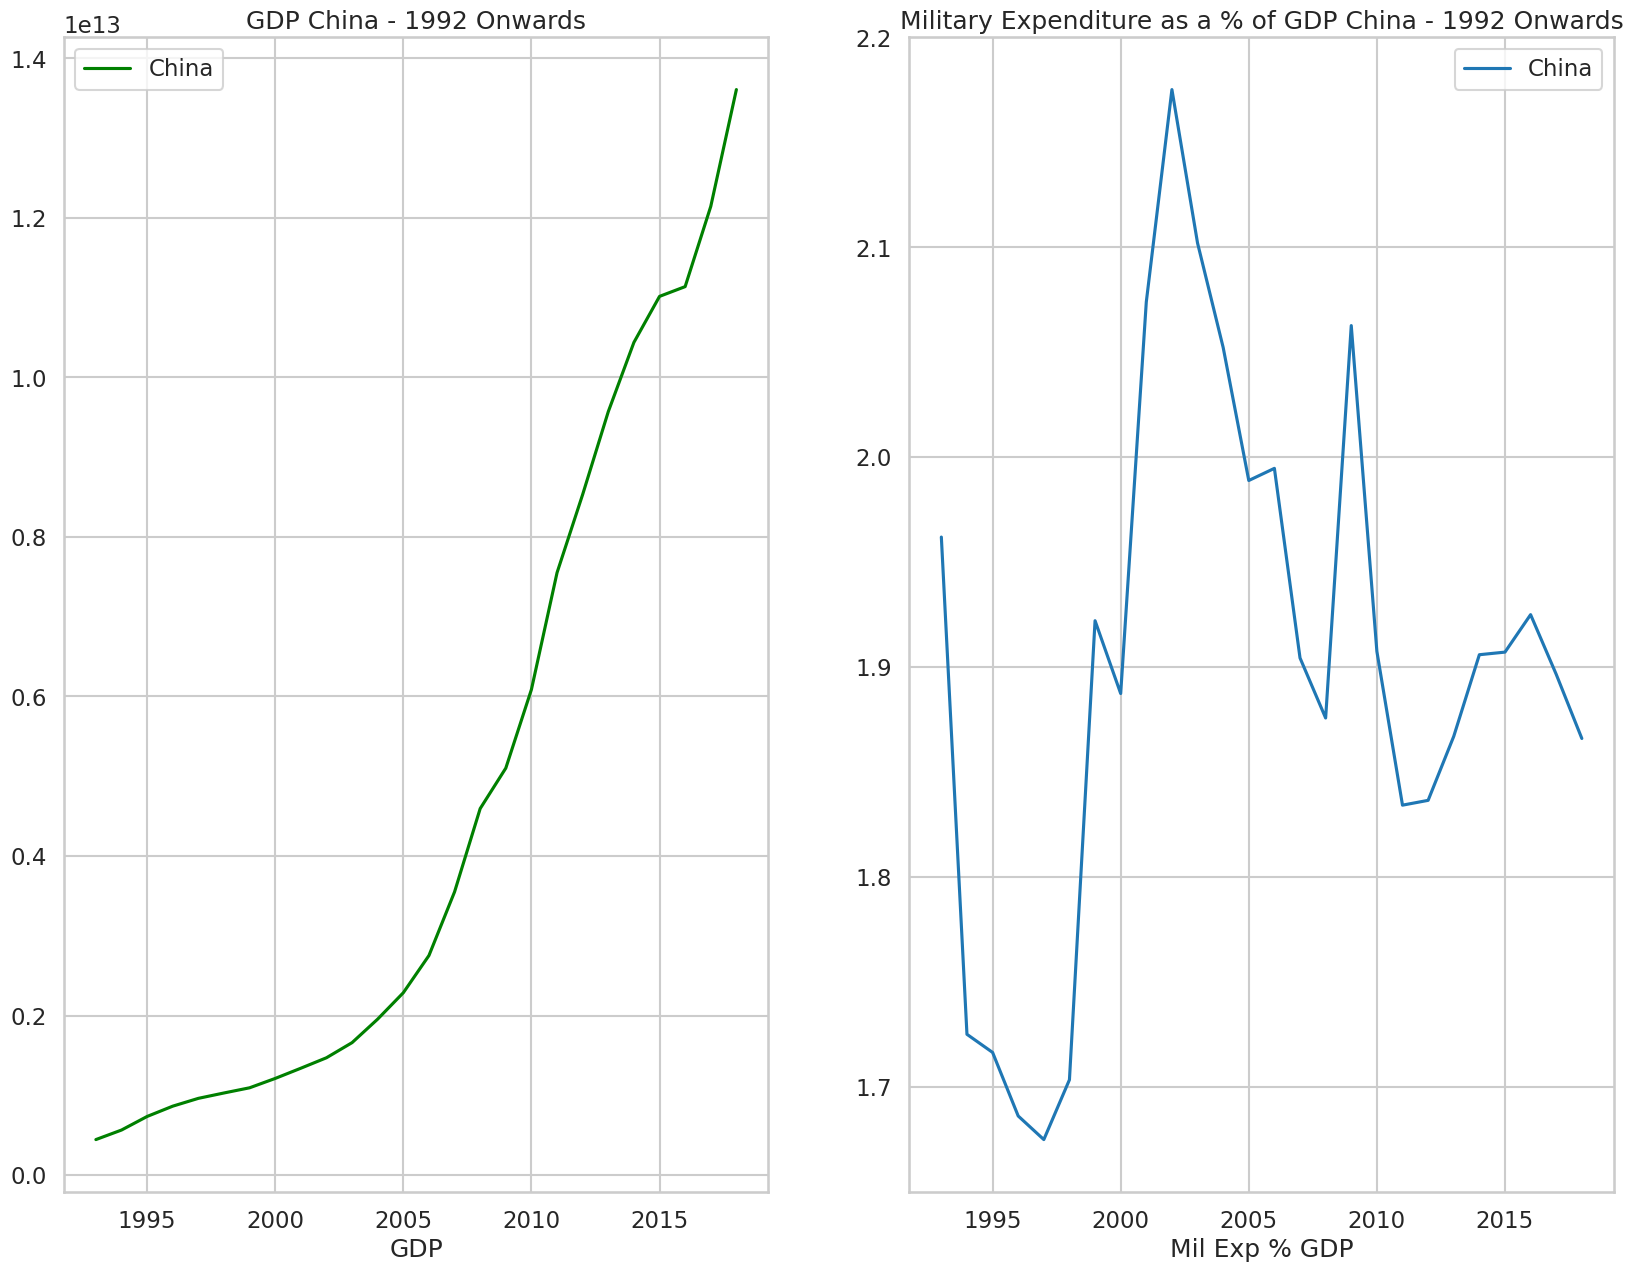

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,15))
ax = plt.gca()
gdp_six.plot(kind='line',x='GDP',y='China',ax=ax1, color='green')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='China',ax=ax2)
ax1.set_title('GDP China - 1992 Onwards')
ax2.set_title('Military Expenditure as a % of GDP China - 1992 Onwards')


Despite the steady growing nascent stages of GDP, China invested around 2.18 % of its GDP which was 1.9-2.5 trillion in 2003-2004 in military. The second highest steep growth can been seen after 2008 to the beginning of 2010 with close to 2.05% of the GDP. 


# Kyrgyz Republic, Kazakhstan, Uzbekistan, Tajikistan

<table><tr><td><img src='https://cdn.countryflags.com/thumbs/kyrgyzstan/flag-400.png'></td><td><img src='https://cdn.countryflags.com/thumbs/kazakhstan/flag-400.png'></td></tr></table>
<table><tr><td><img src='https://cdn.countryflags.com/thumbs/uzbekistan/flag-400.png'></td><td><img src='https://cdn.countryflags.com/thumbs/tajikistan/flag-400.png'></td></tr></table>



## a) Land

Text(0.5, 1.0, 'Land Area of Central Asia countries - 1992 onwards')

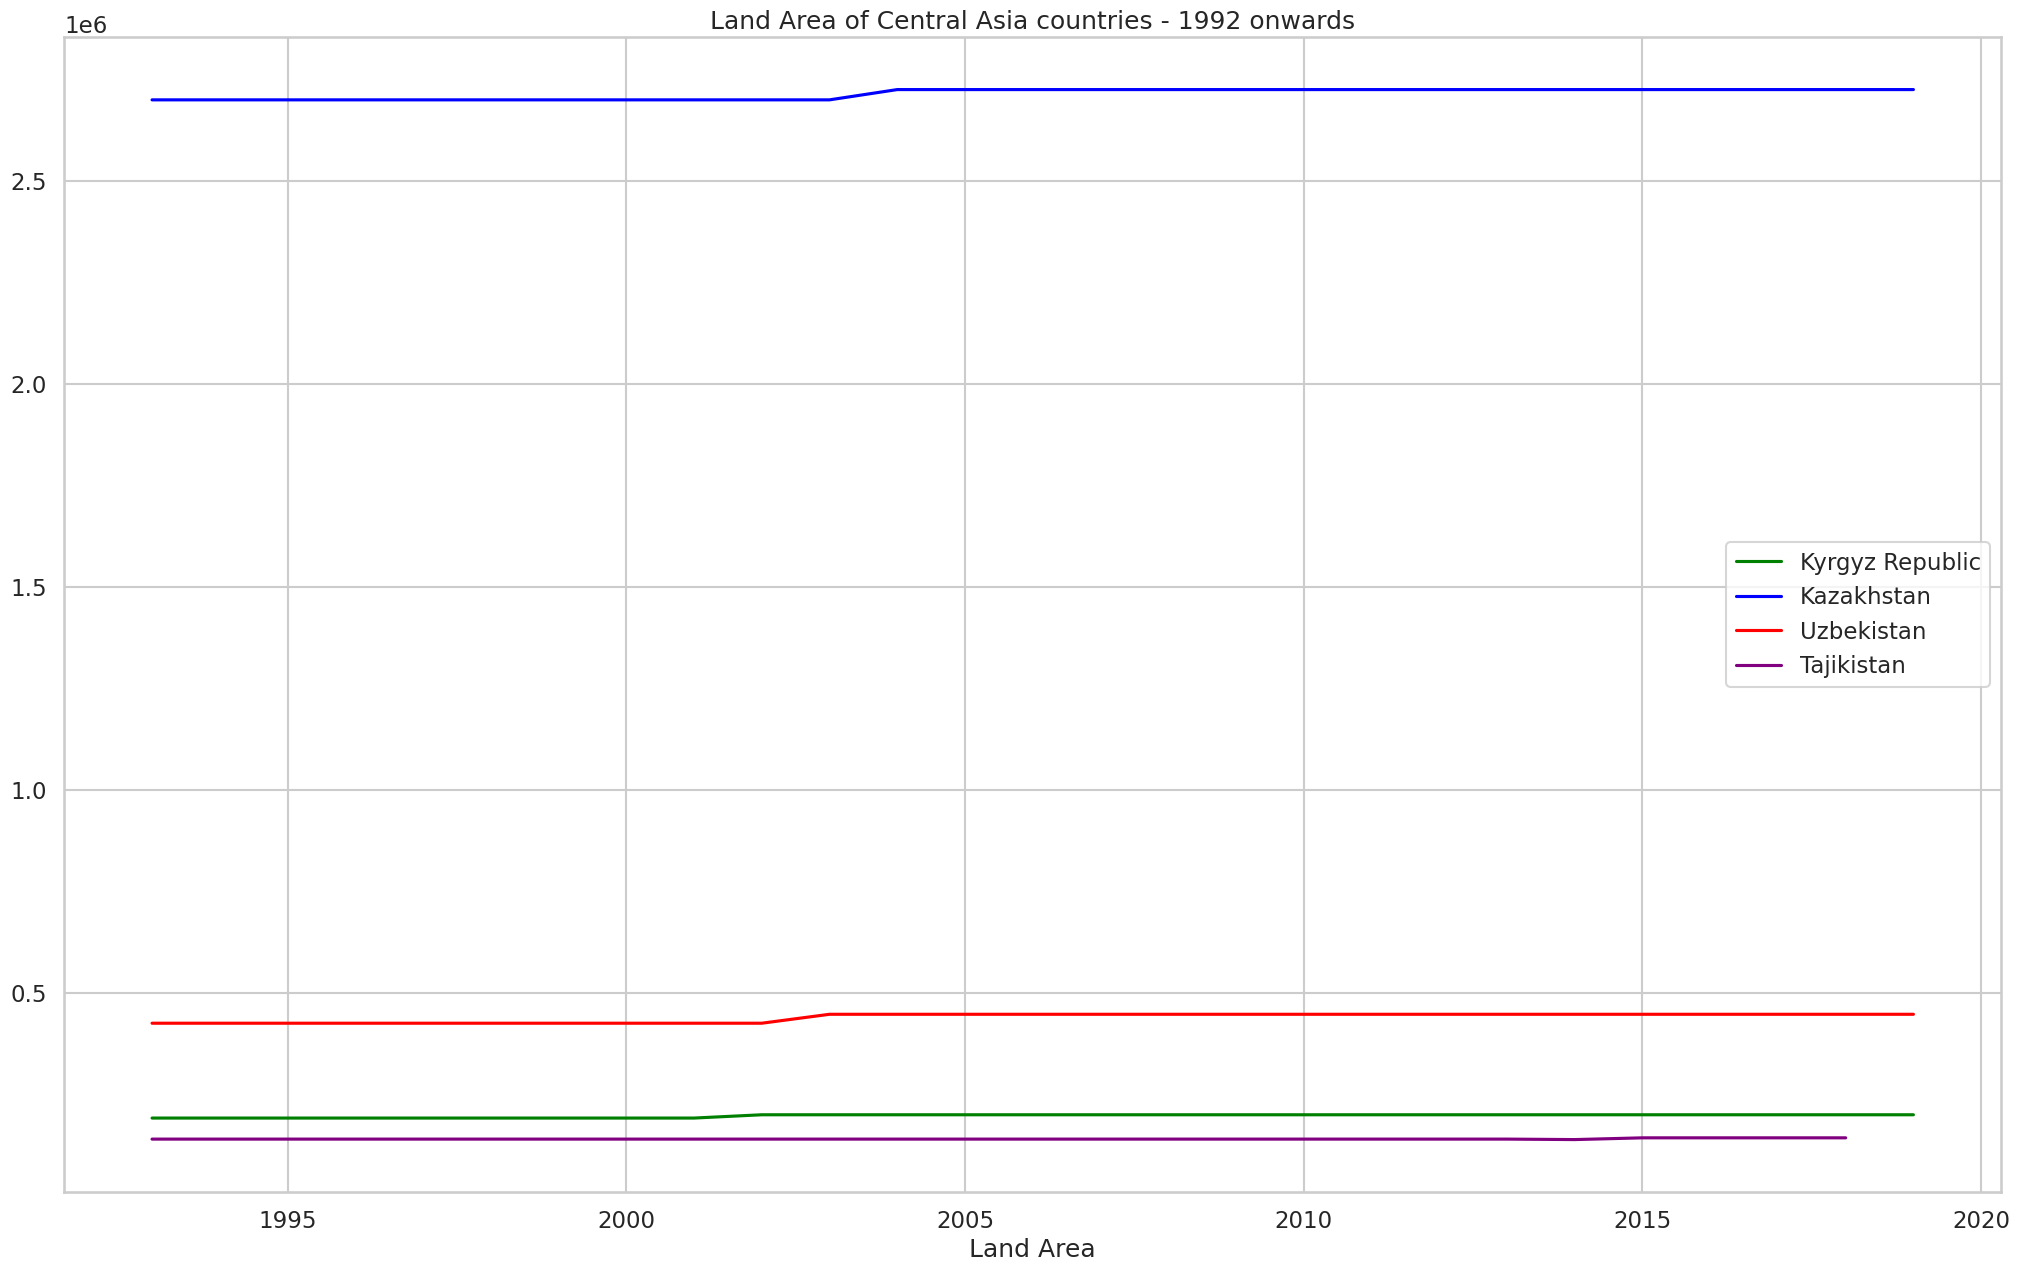

In [176]:
fig,ax = plt.subplots(1,1,figsize=(25,15))
land_area_six.plot(kind='line',x='Land Area',y='Kyrgyz Republic',ax=ax, color='green')
land_area_six.plot(kind='line',x='Land Area',y='Kazakhstan',ax=ax, color='blue')
land_area_six.plot(kind='line',x='Land Area',y='Uzbekistan',ax=ax, color='red')
land_area_six.plot(kind='line',x='Land Area',y='Tajikistan',ax=ax, color='purple')
ax.set_title('Land Area of Central Asia countries - 1992 onwards')

This graph represents the land area (in square kilometers) of four countries in Central Asia: Kyrgyz Republic, Kazakhstan, Uzbekistan, and Tajikistan.                               
                                                                                                                                                                                                Firstly goes Kazakhstan has area  2.7 million sq. km.                                                      
Then goes Uzbekistan with area 447400 sq. km.                                                                            
After Uzbekistan goes Kyrgyz Republic with area 199900 sq. km.                                            
And lastly goes Tajikistan with area 143099 sq. km.

## b) Population

Text(0.5, 1.0, 'Population of Potential Superpowers - 1992 onwards')

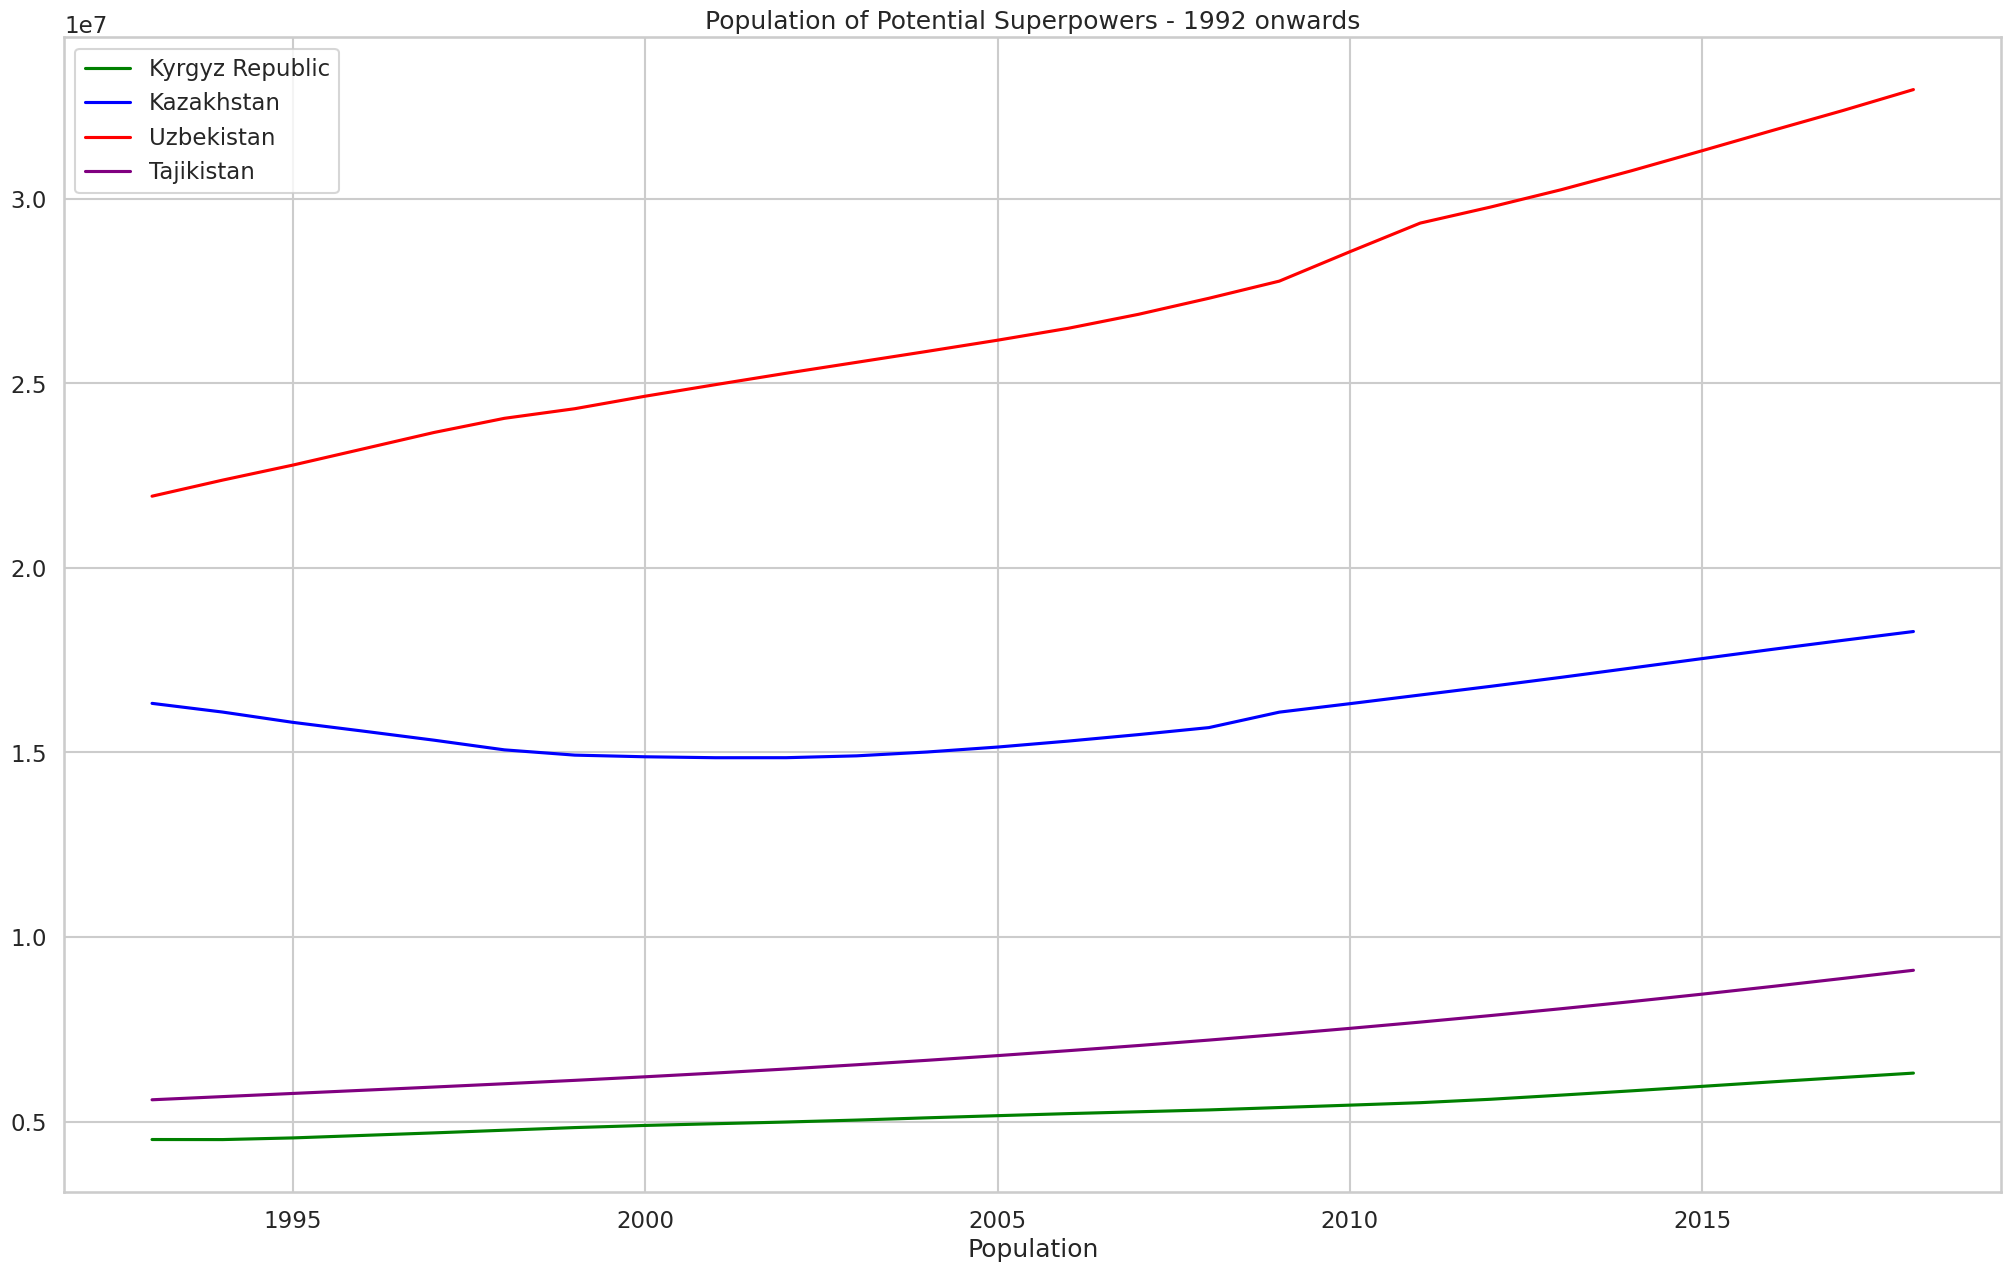

In [131]:
fig,ax = plt.subplots(1,1,figsize=(25,15))
pop_six.plot(kind='line',x='Population',y='Kyrgyz Republic',ax=ax, color='green')
pop_six.plot(kind='line',x='Population',y='Kazakhstan',ax=ax, color='blue')
pop_six.plot(kind='line',x='Population',y='Uzbekistan',ax=ax, color='red')
pop_six.plot(kind='line',x='Population',y='Tajikistan',ax=ax, color='purple')
ax.set_title('Population of Central Asia countries - 1992 onwards')

The data includes population figures for the Kyrgyz Republic (Kyrgyzstan), Kazakhstan, Uzbekistan, and Tajikistan. The data includes population of each country has been listed over a series of years.

Kyrgyz Republic (Kyrgyzstan): The population starts at around 2.17 million in the first year and gradually increases each year. By the most recent year available, the population has reached approximately 6.31 million.

Kazakhstan: The population of Kazakhstan begins at around 9.93 million and shows a consistent upward trend throughout the years. The population reaches around 18.29 million in the first year and increases to approximately 18.28 million by the latest recorded year.

Uzbekistan: The population of Uzbekistan starts at approximately 8.53 million and consistently grows over the years. The population reaches around 34.95 million in the initial year and continues to increase, reaching approximately 32.95 million by the most recent year available.

Tajikistan: The data provided for Tajikistan starts with a population of around 2.08 million and shows steady growth over the years.By the most recent year available, the population has reached approximately 9.1 million.


## c) GDP

Text(0.5, 1.0, 'GDP of Potential Superpowers - 1992 onwards')

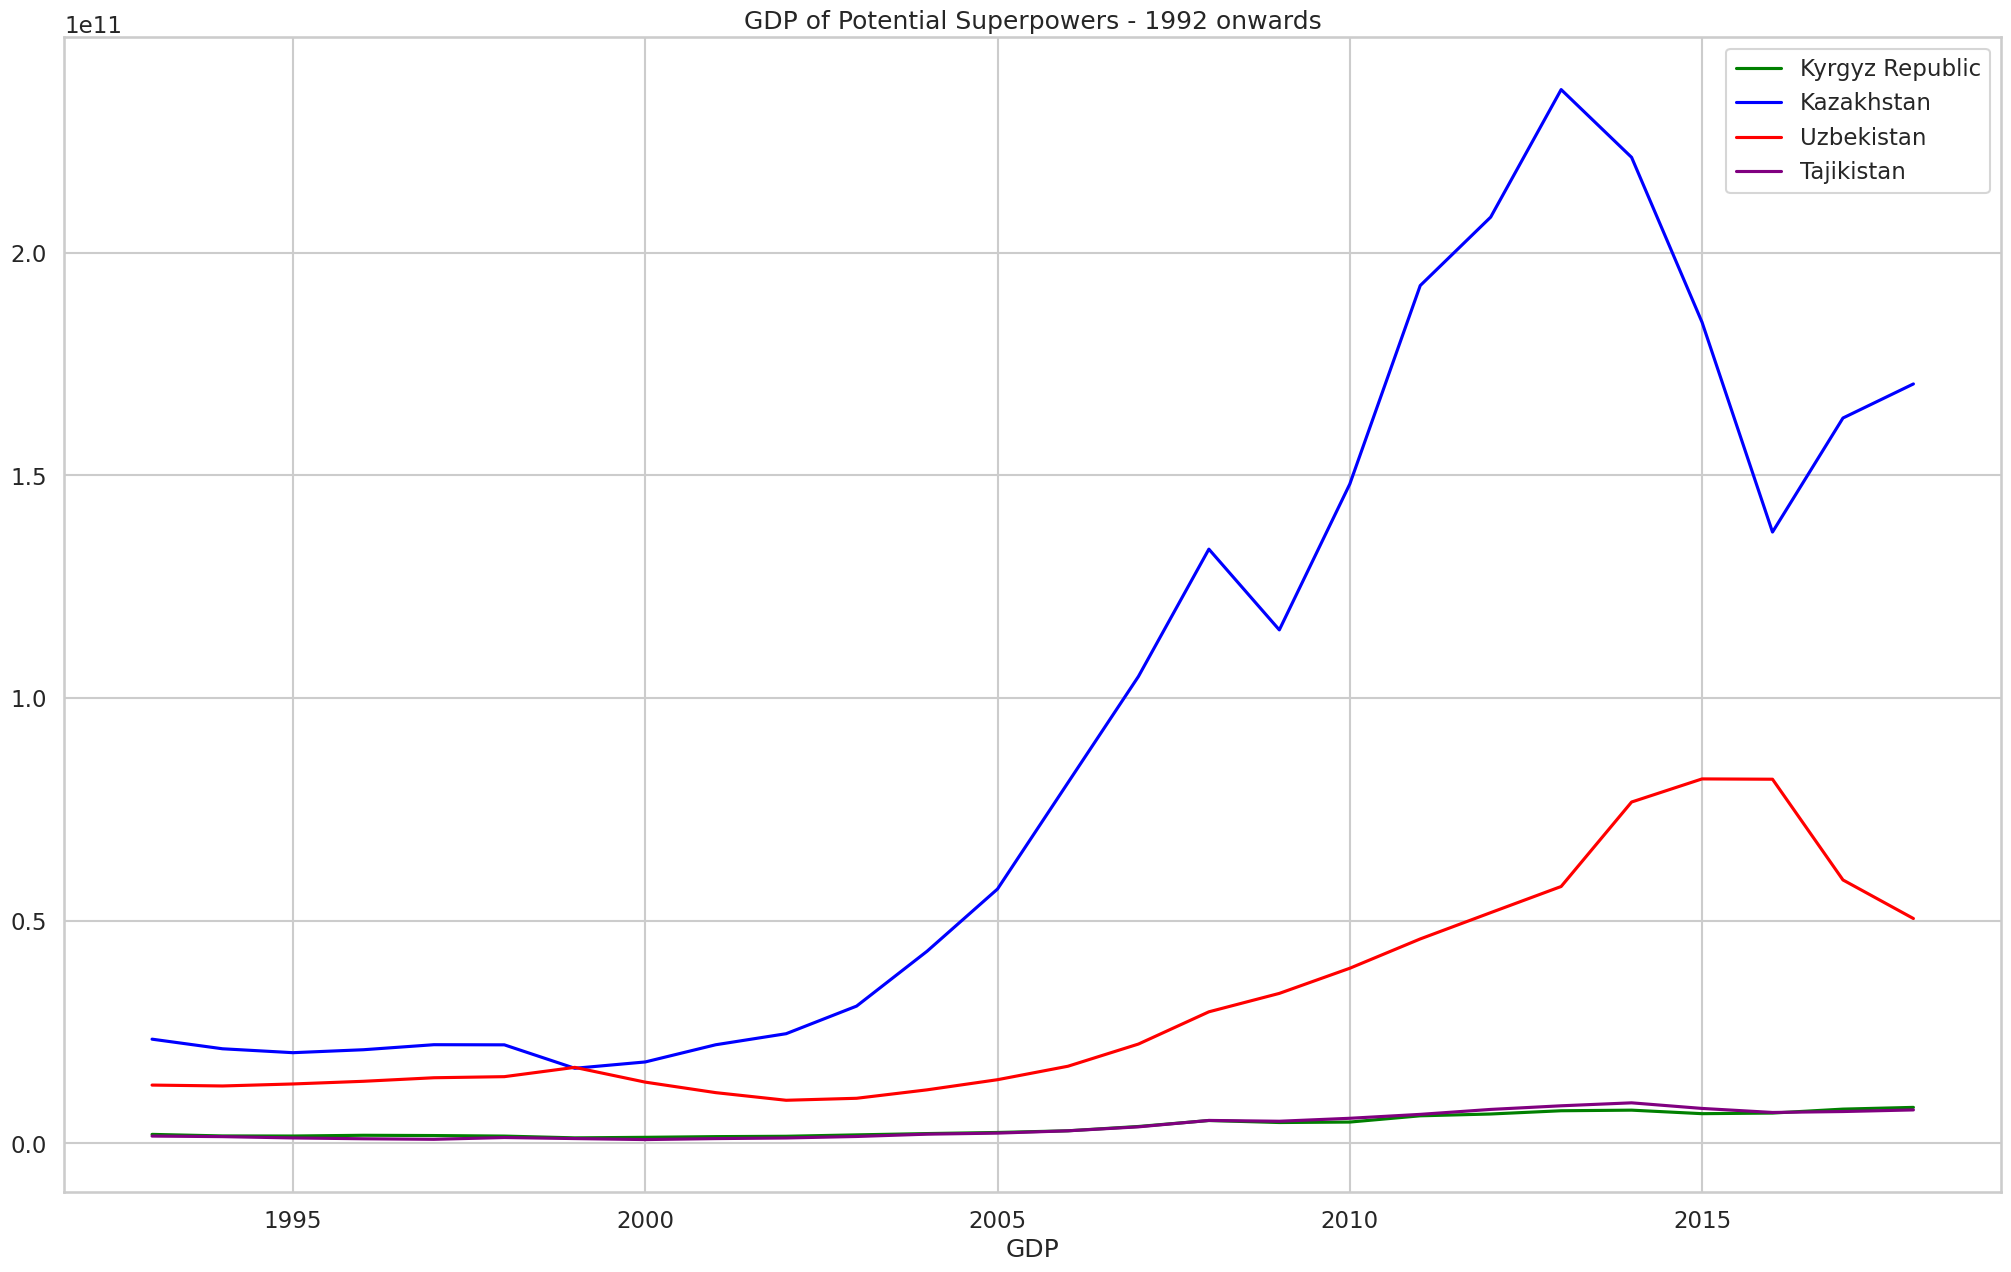

In [132]:
fig,ax = plt.subplots(1,1,figsize=(25,15))
gdp_six.plot(kind='line',x='GDP',y='Kyrgyz Republic',ax=ax, color='green')
gdp_six.plot(kind='line',x='GDP',y='Kazakhstan',ax=ax, color='blue')
gdp_six.plot(kind='line',x='GDP',y='Uzbekistan',ax=ax, color='red')
gdp_six.plot(kind='line',x='GDP',y='Tajikistan',ax=ax, color='purple')
ax.set_title('GDP of Central Asia countries - 1992 onwards')

This graph includes GDP (Gross Domestic Product) figures for four countries: Kyrgyz Republic, Kazakhstan, Uzbekistan, and Tajikistan. Here's a brief explanation of the data:

Kyrgyz Republic: The GDP of the Kyrgyz Republic is given in current US dollars. The GDP figures start at approximately 2.68 billion and gradually increase over the years. The latest recorded GDP is approximately 8.09 billion US dollars.

Kazakhstan: The GDP of Kazakhstan is given in current US dollars. The GDP figures start at approximately 26.93 billion and show a fluctuating pattern over the years. The latest recorded GDP is approximately 170.54 billion US dollars.

Uzbekistan: The GDP of Uzbekistan is given in current US dollars. The GDP figures start at approximately 13.36 billion and show an increasing trend over the years. The latest recorded GDP is approximately 81.85 billion US dollars.

Tajikistan: The GDP of Tajikistan is given in current US dollars. The GDP figures start at approximately 2.63 billion and show a gradual increase over the years. The latest recorded GDP is approximately 7.53 billion US dollars.


## (c) Military

### (i) Armed Forces Total

Text(0.5, 1.0, 'Armed Forces Total - 1992 Onwards')

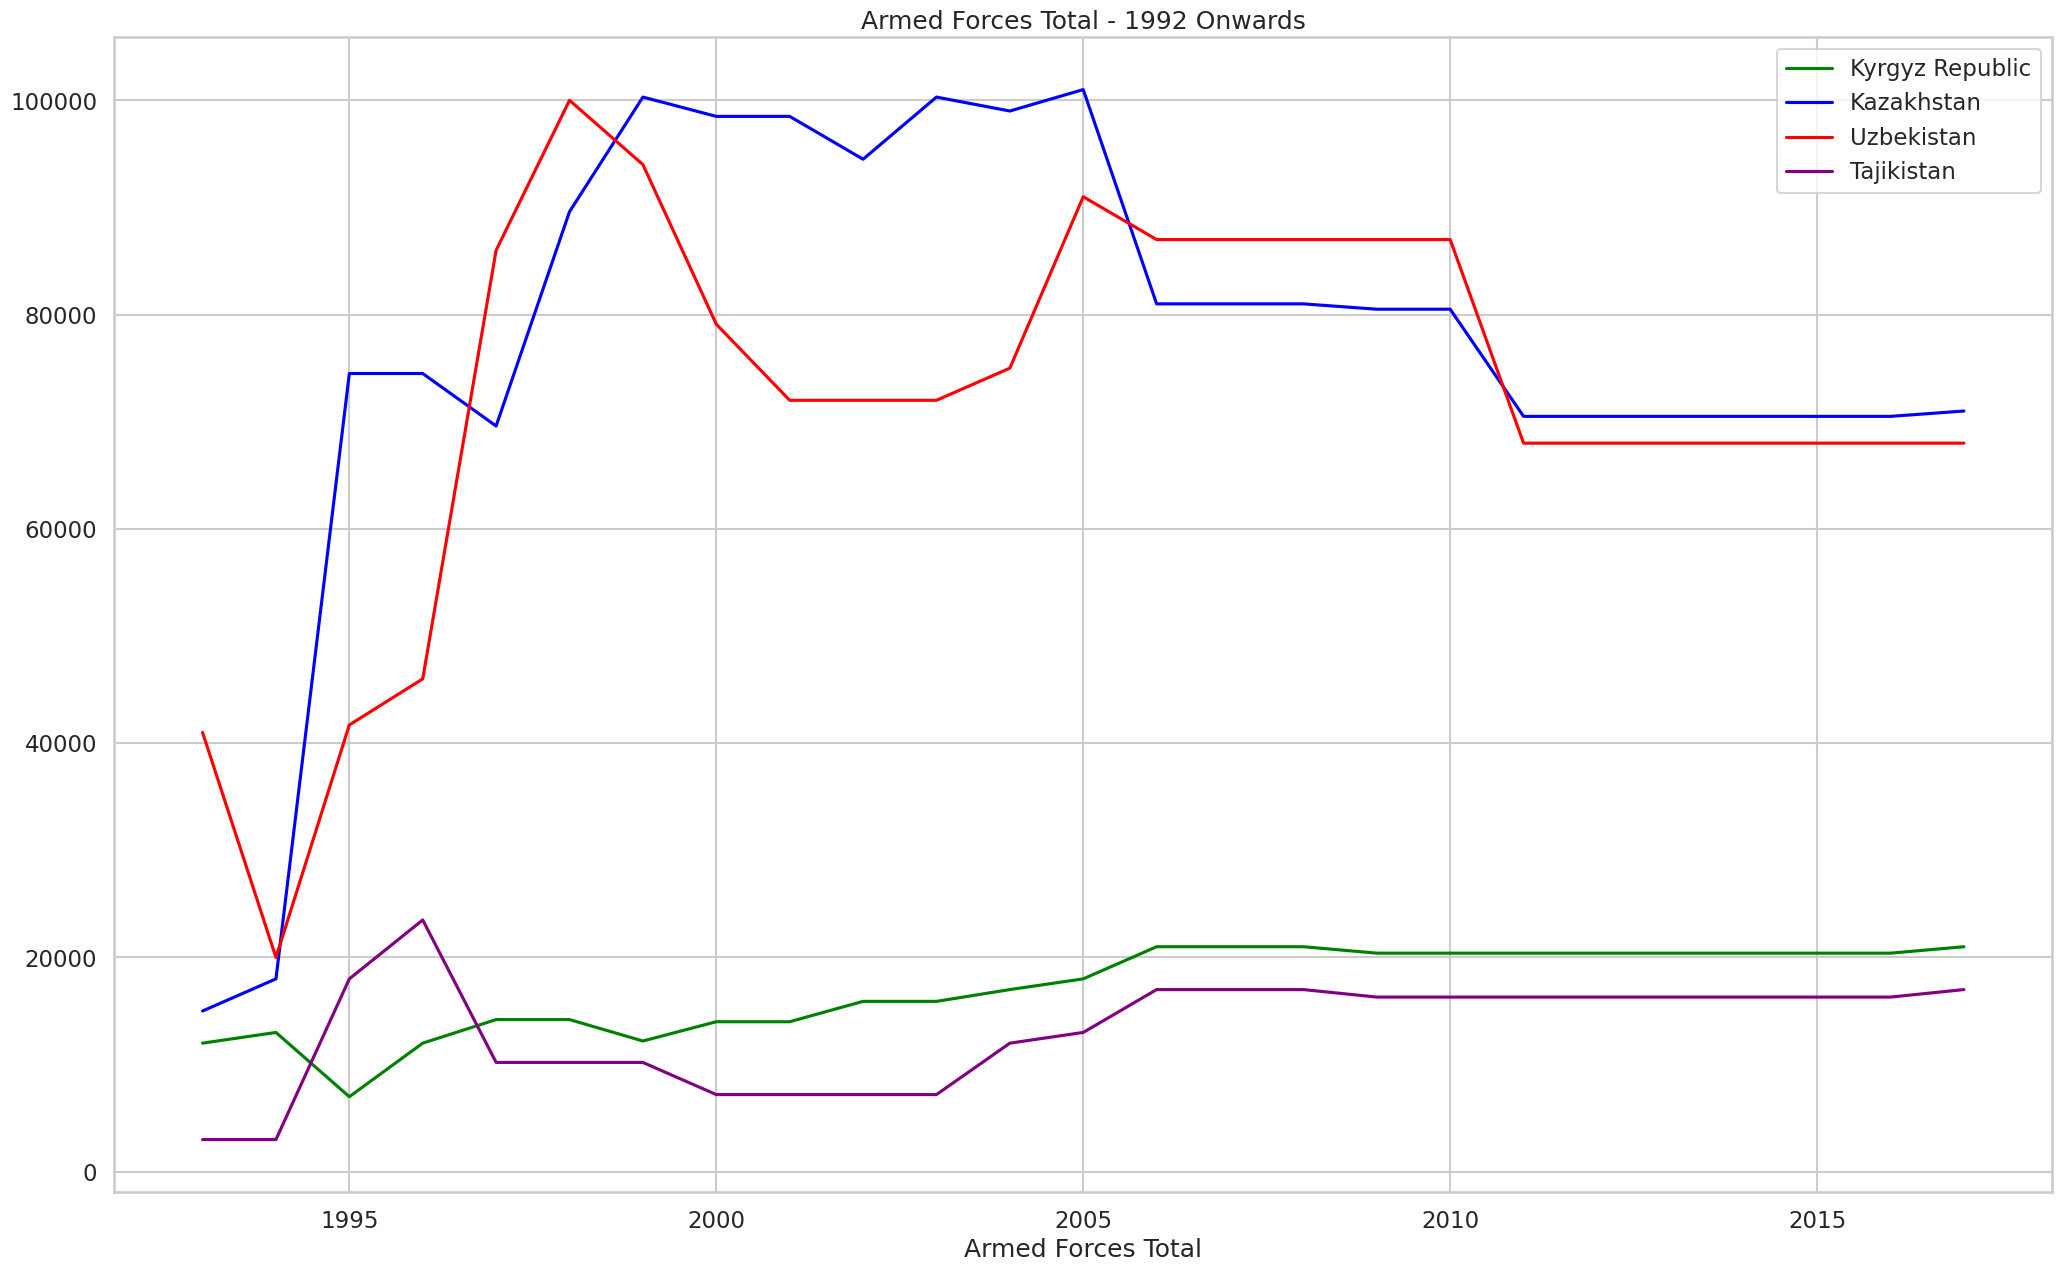

In [177]:
fig, ax = plt.subplots(1,1,figsize=(25,15))
ax = plt.gca()
armedforces_six.plot(kind='line',x='Armed Forces Total',y='Kyrgyz Republic',ax=ax, color='green')
armedforces_six.plot(kind='line',x='Armed Forces Total',y='Kazakhstan',ax=ax, color='blue')
armedforces_six.plot(kind='line',x='Armed Forces Total',y='Uzbekistan',ax=ax, color='red')
armedforces_six.plot(kind='line',x='Armed Forces Total',y='Tajikistan',ax=ax, color='purple')
ax.set_title('Armed Forces Total of Central Asia countries - 1992 Onwards')

This graph includes the total number of armed forces personnel for four countries: Kyrgyz Republic, Kazakhstan, Uzbekistan, and Tajikistan. Here's a summary of the data:

Kyrgyz Republic: The total number of armed forces personnel in the Kyrgyz Republic starts at 12,000 and remains constant until it increases to 14,200. From there, it fluctuates between 12,200 and 21,000.

Kazakhstan: The total number of armed forces personnel in Kazakhstan starts at 15,000 and gradually increases over time. It shows significant fluctuations, reaching a peak of 100,300 before decreasing to 81,000. The latest recorded figure is 71,000.

Uzbekistan: The total number of armed forces personnel in Uzbekistan starts at 40,000 and shows variations over the years. It reaches a peak of 100,000 before decreasing to 68,000. The latest recorded figure is also 68,000.

Tajikistan: The total number of armed forces personnel in Tajikistan starts at 3,000 and increases to 23,500 before decreasing to 16,300. The latest recorded figure is 17,000.



Text(0.5, 1.0, 'Military Expenditure as a % of GDP Central Asia countries - 1992 Onwards')

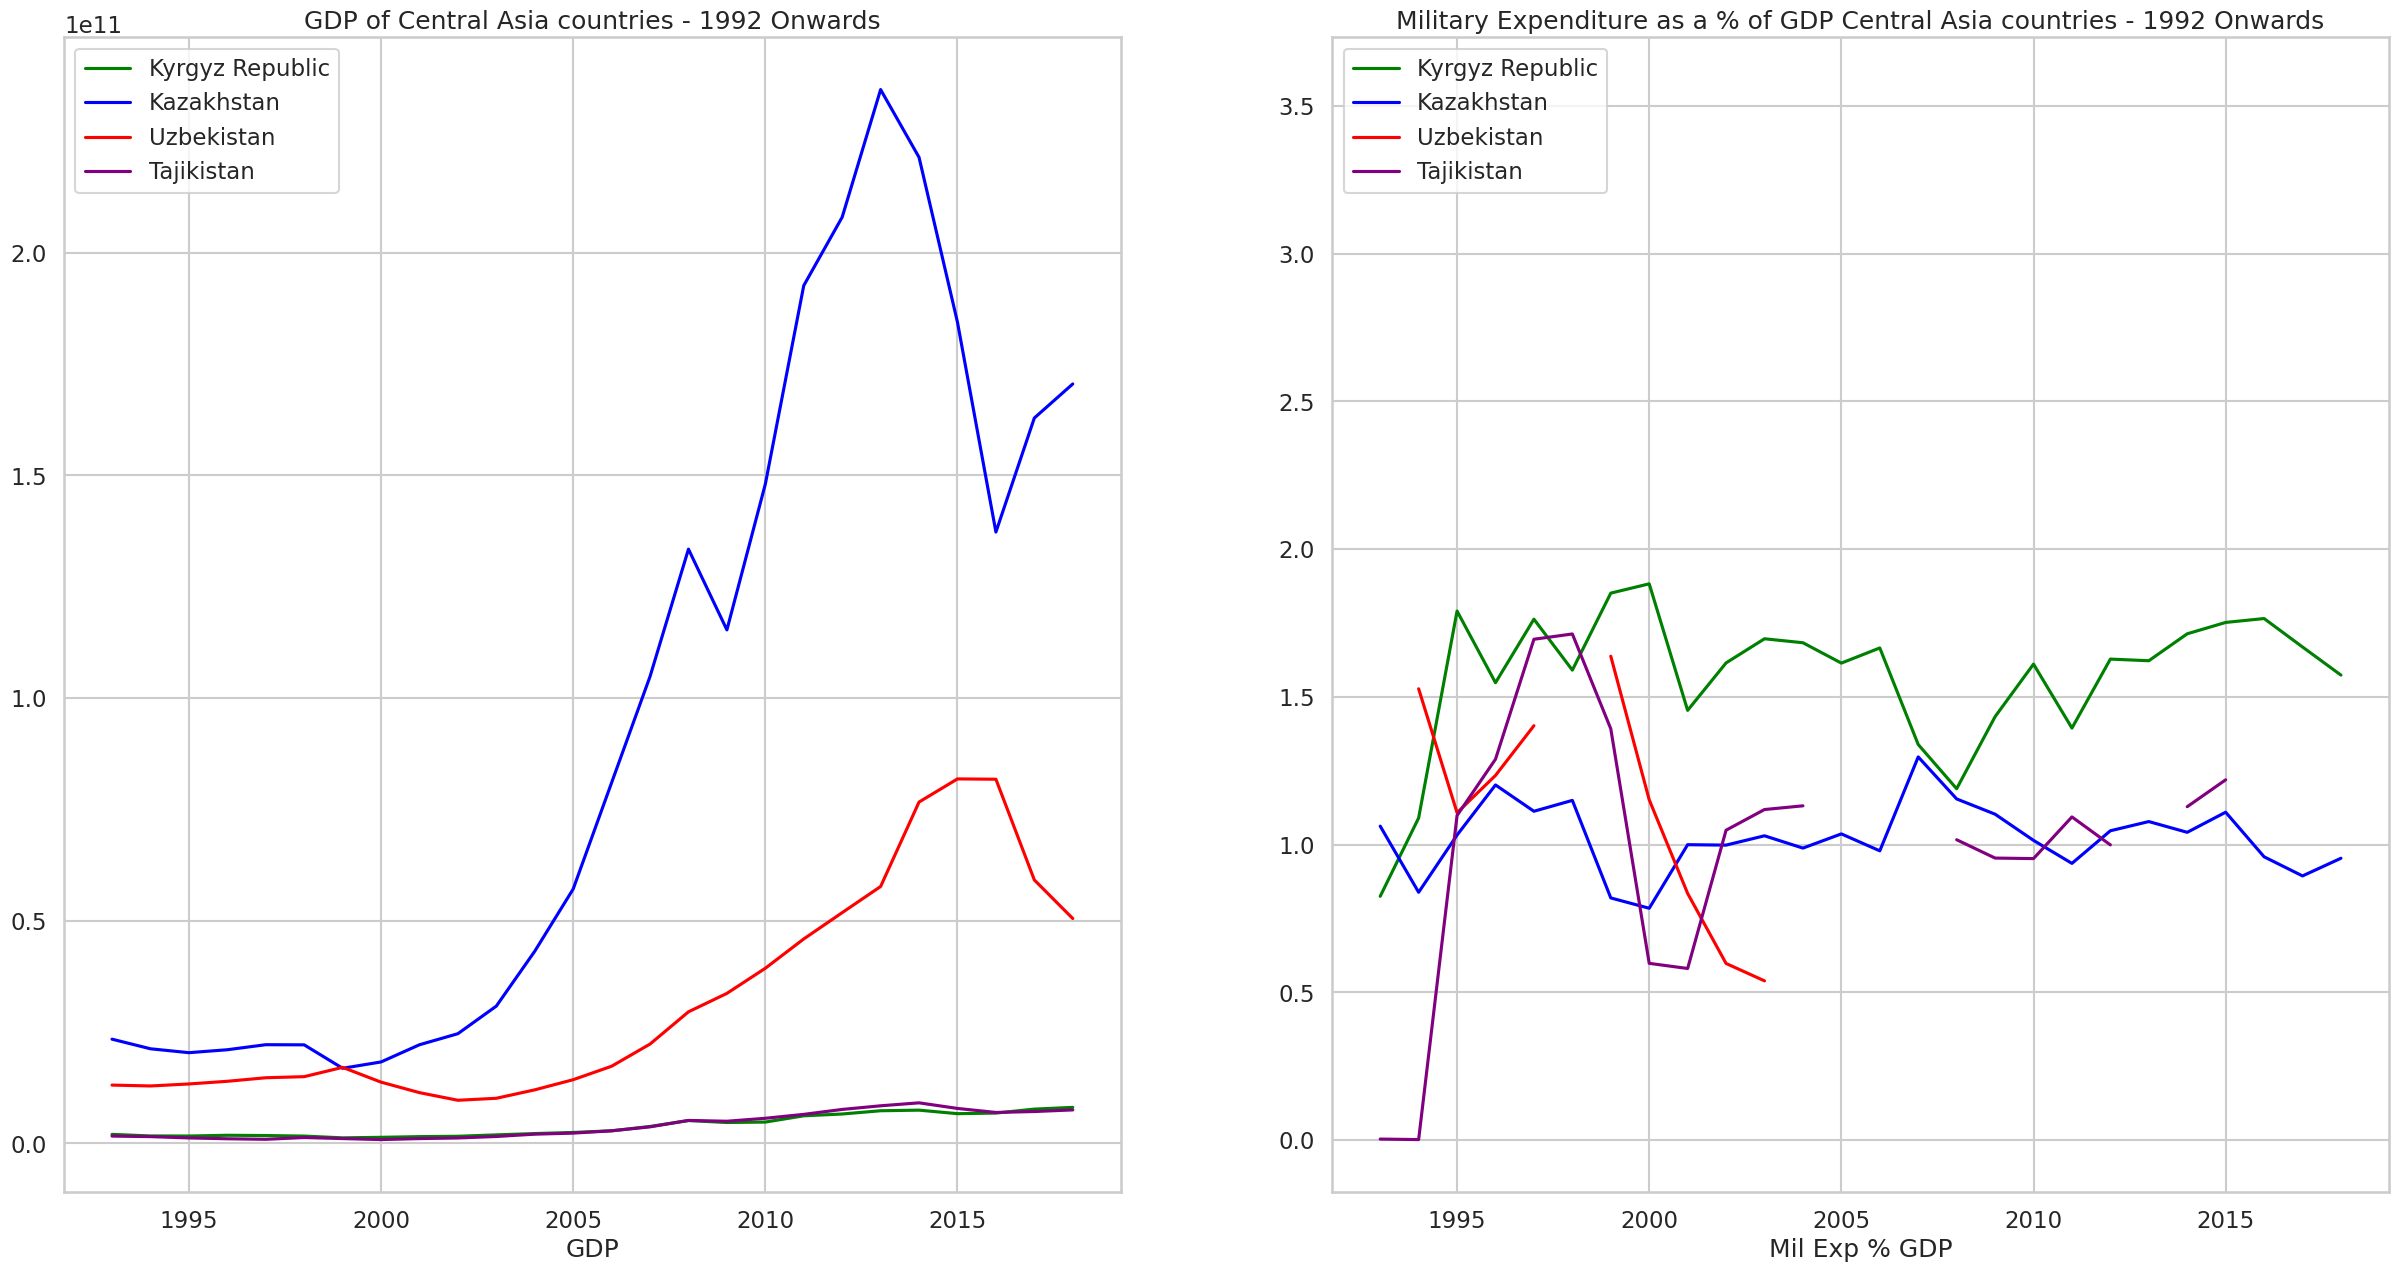

In [178]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,15))
ax = plt.gca()
gdp_six.plot(kind='line',x='GDP',y='Kyrgyz Republic',ax=ax1, color='green')
gdp_six.plot(kind='line',x='GDP',y='Kazakhstan',ax=ax1, color='blue')
gdp_six.plot(kind='line',x='GDP',y='Uzbekistan',ax=ax1, color='red')
gdp_six.plot(kind='line',x='GDP',y='Tajikistan',ax=ax1, color='purple')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='Kyrgyz Republic',ax=ax2, color='green')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='Kazakhstan',ax=ax2, color='blue')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='Uzbekistan',ax=ax2, color='red')
milexp_gdp_six.plot(kind='line',x='Mil Exp % GDP',y='Tajikistan',ax=ax2, color='purple')
ax1.set_title('GDP of Central Asia countries - 1992 Onwards')
ax2.set_title('Military Expenditure as a % of GDP Central Asia countries - 1992 Onwards')

Based on the graph on military expenditure,this is a summary for each country:

Kyrgyz Republic:

Military expenditure (% of GDP): The Kyrgyz Republic's military expenditure as a percentage of GDP shows a fluctuating trend, ranging from 0.85% to 1.88%. The latest recorded figure is 1.88%.
Military expenditure (% of general government expenditure): The military expenditure as a percentage of the general government expenditure in Kyrgyz Republic ranges from 4.73% to 6.23%. The latest recorded figure is 6.04%.
Kazakhstan:

Military expenditure (% of GDP): Kazakhstan's military expenditure as a percentage of GDP fluctuates between 0.78% and 1.30%. The latest recorded figure is 0.89%.
Military expenditure (% of general government expenditure): The military expenditure as a percentage of the general government expenditure in Kazakhstan ranges from 4.26% to 5.47%. The latest recorded figure is 4.77%.
Uzbekistan:

Military expenditure (% of GDP): Uzbekistan's military expenditure as a percentage of GDP shows variations over time, ranging from 0.54% to 1.64%. The latest recorded figure is 3.56%.
Military expenditure (% of general government expenditure): The military expenditure as a percentage of the general government expenditure in Uzbekistan ranges from 1.37% to 4.88%. The latest recorded figure is 4.50%.
Tajikistan:

Military expenditure (% of GDP): Tajikistan's military expenditure as a percentage of GDP shows a fluctuating trend, starting from a very low value and ranging from 0.00% to 1.71%. The latest recorded figure is 1.13%.
Military expenditure (% of general government expenditure): The military expenditure as a percentage of the general government expenditure in Tajikistan ranges from 3.33% to 11.73%. The latest recorded figure is 3.82%.

These percentages represent the proportion of military spending relative to GDP or general government expenditure in each respective country.